In [1]:
from scipy import ndimage
import pandas as pd
import numpy as np
from numpy import genfromtxt
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
from matplotlib.colors import LinearSegmentedColormap

cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)

In [3]:
x1 = genfromtxt('data_magV_1.5.csv', delimiter=',')
x2 = genfromtxt('data_magV_1.6.csv', delimiter=',')
x3 = genfromtxt('data_magV_1.7.csv', delimiter=',')
x4 = genfromtxt('data_magV_1.8.csv', delimiter=',')
x5 = genfromtxt('data_magV_1.9.csv', delimiter=',')
x6 = genfromtxt('data_magV_2.1.csv', delimiter=',')
x7 = genfromtxt('data_magV_2.2.csv', delimiter=',')
x8 = genfromtxt('data_magV_2.3.csv', delimiter=',')
x9 = genfromtxt('data_magV_2.4.csv', delimiter=',')
x10 = genfromtxt('data_magV_2.5.csv', delimiter=',')
x11 = genfromtxt('data_magV_2.6.csv', delimiter=',')
x1 = x1.astype('float32')
x2 = x2.astype('float32')
x3 = x3.astype('float32')
x4 = x4.astype('float32')
x5 = x5.astype('float32')
x6 = x6.astype('float32')
x7 = x7.astype('float32')
x8 = x8.astype('float32')
x9 = x9.astype('float32')
x10 = x10.astype('float32')
x11 = x11.astype('float32')

x_train = np.vstack((x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11))
x_train = np.reshape(x_train, (11, 100, 100, 1))

x_test = genfromtxt('data_magV_2.0.csv', delimiter=',')
x_test = x_test.astype('float32')
x_test = np.reshape(x_test, (1, 100, 100, 1))

In [4]:
tsr_train = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])
tsr_test = np.array([2.0])

tsr_train = np.reshape(tsr_train, (11, 1, 1, 1))
tsr_test = np.reshape(tsr_test, (1, 1, 1, 1))

In [5]:
input_img = tf.keras.Input(shape=(100, 100, 1), name='input_img')
input_tsr = tf.keras.Input(shape=(1, 1, 1), name='input_tsr')

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(input_img)
x = tf.keras.layers.MaxPooling2D((5, 5), padding='same')(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
encoded = tf.keras.layers.MaxPooling2D((4, 4), padding='same')(x)

reshape1 = tf.keras.layers.Reshape((encoded.shape[1]*encoded.shape[2]*encoded.shape[3], 1))(encoded)
reshape2 = tf.keras.layers.Reshape((input_tsr.shape[1]*input_tsr.shape[2]*input_tsr.shape[3], 1))(input_tsr)
concatt = tf.keras.layers.Concatenate(axis=1)([reshape1, reshape2])
flatten = tf.keras.layers.Flatten()(concatt)
out = tf.keras.layers.Dense(encoded.shape[1]*encoded.shape[2]*encoded.shape[3], activation='relu')(flatten)
reshape = tf.keras.layers.Reshape((encoded.shape[1], encoded.shape[2], encoded.shape[3]))(out)

x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(reshape)
x = tf.keras.layers.UpSampling2D((4, 4))(x)
x = tf.keras.layers.Conv2D(300, (3, 3), activation='relu', padding='same', kernel_regularizer=tf.keras.regularizers.l2(1e-05))(x)
x = tf.keras.layers.UpSampling2D((5, 5))(x)
decoded = tf.keras.layers.Conv2D(1, (3, 3), activation=None, padding='same')(x)

# 오토인코더 = 인코더 + 디코더
autoencoder = tf.keras.Model([input_img, input_tsr], decoded)

In [6]:
autoencoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 100, 100, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 100, 100, 30  3000        ['input_img[0][0]']              
                                0)                                                                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 20, 20, 300)  0           ['conv2d[0][0]']                 
                                                                                              

In [7]:
autoencoder.compile(optimizer = tf.keras.optimizers.Adam(0.001),
                    loss = tf.keras.losses.MeanSquaredError(),
                    metrics=[tf.keras.metrics.MeanAbsoluteError(name="mae"),
                            tf.keras.metrics.MeanAbsolutePercentageError(name="mape"),
                            tf.keras.metrics.RootMeanSquaredError(name="rmse"),
                            tf.keras.metrics.MeanSquaredLogarithmicError(name="msle")])

In [8]:
history = autoencoder.fit([x_train, tsr_train], x_train, epochs=10000, shuffle=True)

Epoch 1/10000
1/1 [==============================] - 3s 3s/step - loss: 55.6695 - mae: 7.0803 - mape: 100.1502 - rmse: 7.4606 - msle: 4.1281
Epoch 2/10000
1/1 [==============================] - 0s 47ms/step - loss: 854.3875 - mae: 27.1105 - mape: 476.0902 - rmse: 29.2298 - msle: 2.4562
Epoch 3/10000
1/1 [==============================] - 0s 47ms/step - loss: 37.3492 - mae: 5.6481 - mape: 77.1964 - rmse: 6.1107 - msle: 1.4606
Epoch 4/10000
1/1 [==============================] - 0s 45ms/step - loss: 52.7368 - mae: 6.8771 - mape: 96.9787 - rmse: 7.2614 - msle: 3.5792
Epoch 5/10000
1/1 [==============================] - 0s 45ms/step - loss: 54.5709 - mae: 7.0057 - mape: 98.9990 - rmse: 7.3866 - msle: 4.0210
Epoch 6/10000
1/1 [==============================] - 0s 46ms/step - loss: 55.0950 - mae: 7.0428 - mape: 99.5980 - rmse: 7.4220 - msle: 4.1627
Epoch 7/10000
1/1 [==============================] - 0s 45ms/step - loss: 55.2843 - mae: 7.0562 - mape: 99.8164 - rmse: 7.4347 - msle: 4.2159
Epo

1/1 [==============================] - 0s 46ms/step - loss: 0.9859 - mae: 0.7858 - mape: 12.7606 - rmse: 0.9887 - msle: 0.0190
Epoch 59/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.9658 - mae: 0.7793 - mape: 12.7446 - rmse: 0.9785 - msle: 0.0188
Epoch 60/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.9484 - mae: 0.7755 - mape: 12.8340 - rmse: 0.9695 - msle: 0.0187
Epoch 61/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.9380 - mae: 0.7740 - mape: 12.9170 - rmse: 0.9642 - msle: 0.0186
Epoch 62/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.9228 - mae: 0.7671 - mape: 12.8166 - rmse: 0.9563 - msle: 0.0184
Epoch 63/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.9047 - mae: 0.7563 - mape: 12.5688 - rmse: 0.9467 - msle: 0.0180
Epoch 64/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.8923 - mae: 0.7480 - mape: 12.3562 - rmse: 0.9402 - msle: 0.0177
Epoch 65/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.4267 - mae: 0.4740 - mape: 7.9027 - rmse: 0.6469 - msle: 0.0087
Epoch 116/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.5082 - mae: 0.5356 - mape: 8.4180 - rmse: 0.7071 - msle: 0.0098
Epoch 117/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.4116 - mae: 0.4609 - mape: 7.7330 - rmse: 0.6351 - msle: 0.0085
Epoch 118/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.4257 - mae: 0.4745 - mape: 7.9730 - rmse: 0.6461 - msle: 0.0088
Epoch 119/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.4534 - mae: 0.4936 - mape: 7.8308 - rmse: 0.6672 - msle: 0.0089
Epoch 120/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.3851 - mae: 0.4299 - mape: 7.1114 - rmse: 0.6138 - msle: 0.0079
Epoch 121/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.4539 - mae: 0.5035 - mape: 8.4450 - rmse: 0.6675 - msle: 0.0093
Epoch 122/10000
1/1 [=

1/1 [==============================] - 0s 45ms/step - loss: 0.3229 - mae: 0.3852 - mape: 6.5638 - rmse: 0.5609 - msle: 0.0069
Epoch 173/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3222 - mae: 0.3847 - mape: 6.5658 - rmse: 0.5603 - msle: 0.0069
Epoch 174/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3214 - mae: 0.3838 - mape: 6.5405 - rmse: 0.5595 - msle: 0.0069
Epoch 175/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.3206 - mae: 0.3833 - mape: 6.5383 - rmse: 0.5588 - msle: 0.0069
Epoch 176/10000
1/1 [==============================] - 0s 46ms/step - loss: 0.3198 - mae: 0.3829 - mape: 6.5371 - rmse: 0.5582 - msle: 0.0068
Epoch 177/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.3191 - mae: 0.3820 - mape: 6.5120 - rmse: 0.5575 - msle: 0.0068
Epoch 178/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.3183 - mae: 0.3816 - mape: 6.5147 - rmse: 0.5568 - msle: 0.0068
Epoch 179/10000
1/1 [=

1/1 [==============================] - 0s 44ms/step - loss: 0.2823 - mae: 0.3543 - mape: 6.0641 - rmse: 0.5235 - msle: 0.0061
Epoch 230/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2833 - mae: 0.3569 - mape: 6.1344 - rmse: 0.5244 - msle: 0.0061
Epoch 231/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2865 - mae: 0.3596 - mape: 6.0641 - rmse: 0.5275 - msle: 0.0061
Epoch 232/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2887 - mae: 0.3662 - mape: 6.2979 - rmse: 0.5296 - msle: 0.0062
Epoch 233/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2892 - mae: 0.3632 - mape: 6.0932 - rmse: 0.5300 - msle: 0.0061
Epoch 234/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2865 - mae: 0.3638 - mape: 6.2623 - rmse: 0.5275 - msle: 0.0062
Epoch 235/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2831 - mae: 0.3567 - mape: 6.0229 - rmse: 0.5242 - msle: 0.0060
Epoch 236/10000
1/1 [=

1/1 [==============================] - 0s 44ms/step - loss: 0.2580 - mae: 0.3476 - mape: 5.9751 - rmse: 0.4998 - msle: 0.0056
Epoch 287/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2567 - mae: 0.3423 - mape: 5.7391 - rmse: 0.4984 - msle: 0.0054
Epoch 288/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2545 - mae: 0.3435 - mape: 5.8972 - rmse: 0.4963 - msle: 0.0055
Epoch 289/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2527 - mae: 0.3382 - mape: 5.7005 - rmse: 0.4945 - msle: 0.0053
Epoch 290/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2508 - mae: 0.3386 - mape: 5.8200 - rmse: 0.4925 - msle: 0.0054
Epoch 291/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2493 - mae: 0.3345 - mape: 5.6646 - rmse: 0.4910 - msle: 0.0053
Epoch 292/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2479 - mae: 0.3354 - mape: 5.7543 - rmse: 0.4896 - msle: 0.0053
Epoch 293/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.2260 - mae: 0.3224 - mape: 5.5132 - rmse: 0.4667 - msle: 0.0048
Epoch 344/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2270 - mae: 0.3220 - mape: 5.4192 - rmse: 0.4677 - msle: 0.0048
Epoch 345/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2243 - mae: 0.3203 - mape: 5.4808 - rmse: 0.4649 - msle: 0.0048
Epoch 346/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2227 - mae: 0.3181 - mape: 5.4247 - rmse: 0.4632 - msle: 0.0047
Epoch 347/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2236 - mae: 0.3187 - mape: 5.3890 - rmse: 0.4641 - msle: 0.0047
Epoch 348/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2237 - mae: 0.3207 - mape: 5.4875 - rmse: 0.4643 - msle: 0.0048
Epoch 349/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2218 - mae: 0.3172 - mape: 5.3762 - rmse: 0.4622 - msle: 0.0047
Epoch 350/10000
1/1 [=

1/1 [==============================] - 0s 44ms/step - loss: 0.2017 - mae: 0.3060 - mape: 5.2290 - rmse: 0.4399 - msle: 0.0043
Epoch 401/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1981 - mae: 0.2991 - mape: 5.0553 - rmse: 0.4358 - msle: 0.0041
Epoch 402/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1982 - mae: 0.2993 - mape: 5.0456 - rmse: 0.4359 - msle: 0.0041
Epoch 403/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2006 - mae: 0.3054 - mape: 5.2134 - rmse: 0.4387 - msle: 0.0042
Epoch 404/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2039 - mae: 0.3076 - mape: 5.1116 - rmse: 0.4424 - msle: 0.0042
Epoch 405/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2057 - mae: 0.3149 - mape: 5.3689 - rmse: 0.4445 - msle: 0.0043
Epoch 406/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2072 - mae: 0.3126 - mape: 5.1615 - rmse: 0.4461 - msle: 0.0042
Epoch 407/10000
1/1 [=

1/1 [==============================] - 0s 42ms/step - loss: 0.1804 - mae: 0.2874 - mape: 4.8692 - rmse: 0.4151 - msle: 0.0037
Epoch 458/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1816 - mae: 0.2870 - mape: 4.7833 - rmse: 0.4165 - msle: 0.0037
Epoch 459/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1829 - mae: 0.2924 - mape: 4.9601 - rmse: 0.4181 - msle: 0.0038
Epoch 460/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1851 - mae: 0.2917 - mape: 4.8129 - rmse: 0.4206 - msle: 0.0037
Epoch 461/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1877 - mae: 0.3001 - mape: 5.0945 - rmse: 0.4238 - msle: 0.0039
Epoch 462/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1923 - mae: 0.3016 - mape: 4.9125 - rmse: 0.4291 - msle: 0.0038
Epoch 463/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1975 - mae: 0.3151 - mape: 5.3311 - rmse: 0.4351 - msle: 0.0041
Epoch 464/10000
1/1 [=

1/1 [==============================] - 0s 42ms/step - loss: 0.2234 - mae: 0.3492 - mape: 5.4158 - rmse: 0.4639 - msle: 0.0042
Epoch 515/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1755 - mae: 0.2874 - mape: 4.8656 - rmse: 0.4091 - msle: 0.0036
Epoch 516/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1752 - mae: 0.2878 - mape: 4.8790 - rmse: 0.4087 - msle: 0.0036
Epoch 517/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2079 - mae: 0.3279 - mape: 5.1457 - rmse: 0.4469 - msle: 0.0039
Epoch 518/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2226 - mae: 0.3542 - mape: 5.9087 - rmse: 0.4631 - msle: 0.0044
Epoch 519/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2110 - mae: 0.3338 - mape: 5.2267 - rmse: 0.4504 - msle: 0.0040
Epoch 520/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1783 - mae: 0.2938 - mape: 4.9782 - rmse: 0.4125 - msle: 0.0036
Epoch 521/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.2055 - mae: 0.3297 - mape: 5.1206 - rmse: 0.4442 - msle: 0.0038
Epoch 572/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1922 - mae: 0.3191 - mape: 5.3217 - rmse: 0.4291 - msle: 0.0038
Epoch 573/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1725 - mae: 0.2849 - mape: 4.5857 - rmse: 0.4054 - msle: 0.0033
Epoch 574/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1586 - mae: 0.2654 - mape: 4.4592 - rmse: 0.3879 - msle: 0.0032
Epoch 575/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1613 - mae: 0.2707 - mape: 4.5433 - rmse: 0.3914 - msle: 0.0032
Epoch 576/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1742 - mae: 0.2876 - mape: 4.6208 - rmse: 0.4075 - msle: 0.0033
Epoch 577/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1825 - mae: 0.3051 - mape: 5.1208 - rmse: 0.4176 - msle: 0.0036
Epoch 578/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.1678 - mae: 0.2857 - mape: 4.7724 - rmse: 0.3996 - msle: 0.0033
Epoch 629/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1526 - mae: 0.2569 - mape: 4.2694 - rmse: 0.3801 - msle: 0.0030
Epoch 630/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1644 - mae: 0.2755 - mape: 4.4330 - rmse: 0.3953 - msle: 0.0031
Epoch 631/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1794 - mae: 0.3042 - mape: 5.0643 - rmse: 0.4139 - msle: 0.0035
Epoch 632/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1802 - mae: 0.3013 - mape: 4.7798 - rmse: 0.4148 - msle: 0.0034
Epoch 633/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1622 - mae: 0.2764 - mape: 4.6189 - rmse: 0.3925 - msle: 0.0032
Epoch 634/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1514 - mae: 0.2557 - mape: 4.2375 - rmse: 0.3785 - msle: 0.0030
Epoch 635/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.1508 - mae: 0.2562 - mape: 4.1869 - rmse: 0.3777 - msle: 0.0029
Epoch 686/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1510 - mae: 0.2565 - mape: 4.1840 - rmse: 0.3780 - msle: 0.0029
Epoch 687/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1742 - mae: 0.3002 - mape: 4.9895 - rmse: 0.4075 - msle: 0.0034
Epoch 688/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1960 - mae: 0.3243 - mape: 5.0064 - rmse: 0.4335 - msle: 0.0036
Epoch 689/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1856 - mae: 0.3168 - mape: 5.2189 - rmse: 0.4213 - msle: 0.0036
Epoch 690/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1650 - mae: 0.2802 - mape: 4.4468 - rmse: 0.3961 - msle: 0.0031
Epoch 691/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1470 - mae: 0.2520 - mape: 4.2095 - rmse: 0.3727 - msle: 0.0029
Epoch 692/10000
1/1 [=

1/1 [==============================] - 0s 44ms/step - loss: 0.1522 - mae: 0.2628 - mape: 4.2202 - rmse: 0.3797 - msle: 0.0029
Epoch 743/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1464 - mae: 0.2559 - mape: 4.2734 - rmse: 0.3719 - msle: 0.0029
Epoch 744/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1423 - mae: 0.2468 - mape: 4.0371 - rmse: 0.3664 - msle: 0.0027
Epoch 745/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1398 - mae: 0.2427 - mape: 4.0390 - rmse: 0.3629 - msle: 0.0027
Epoch 746/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1390 - mae: 0.2408 - mape: 3.9933 - rmse: 0.3618 - msle: 0.0027
Epoch 747/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1395 - mae: 0.2416 - mape: 3.9873 - rmse: 0.3625 - msle: 0.0027
Epoch 748/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1410 - mae: 0.2451 - mape: 4.0911 - rmse: 0.3645 - msle: 0.0027
Epoch 749/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.1357 - mae: 0.2374 - mape: 3.9528 - rmse: 0.3573 - msle: 0.0026
Epoch 800/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1356 - mae: 0.2367 - mape: 3.9142 - rmse: 0.3571 - msle: 0.0026
Epoch 801/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1354 - mae: 0.2369 - mape: 3.9423 - rmse: 0.3569 - msle: 0.0026
Epoch 802/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1354 - mae: 0.2364 - mape: 3.9072 - rmse: 0.3568 - msle: 0.0026
Epoch 803/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1354 - mae: 0.2369 - mape: 3.9435 - rmse: 0.3569 - msle: 0.0026
Epoch 804/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1356 - mae: 0.2366 - mape: 3.9024 - rmse: 0.3571 - msle: 0.0026
Epoch 805/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1359 - mae: 0.2381 - mape: 3.9670 - rmse: 0.3576 - msle: 0.0026
Epoch 806/10000
1/1 [=

1/1 [==============================] - 0s 42ms/step - loss: 0.1338 - mae: 0.2348 - mape: 3.8739 - rmse: 0.3546 - msle: 0.0026
Epoch 857/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1333 - mae: 0.2340 - mape: 3.8725 - rmse: 0.3539 - msle: 0.0026
Epoch 858/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1345 - mae: 0.2371 - mape: 3.9476 - rmse: 0.3557 - msle: 0.0026
Epoch 859/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1359 - mae: 0.2391 - mape: 3.9068 - rmse: 0.3576 - msle: 0.0026
Epoch 860/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1359 - mae: 0.2402 - mape: 3.9971 - rmse: 0.3575 - msle: 0.0026
Epoch 861/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1347 - mae: 0.2365 - mape: 3.8822 - rmse: 0.3559 - msle: 0.0026
Epoch 862/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1332 - mae: 0.2344 - mape: 3.9031 - rmse: 0.3538 - msle: 0.0026
Epoch 863/10000
1/1 [=

1/1 [==============================] - 0s 43ms/step - loss: 0.1577 - mae: 0.2840 - mape: 4.6918 - rmse: 0.3869 - msle: 0.0030
Epoch 914/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1365 - mae: 0.2421 - mape: 3.9237 - rmse: 0.3585 - msle: 0.0026
Epoch 915/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1307 - mae: 0.2304 - mape: 3.8112 - rmse: 0.3503 - msle: 0.0025
Epoch 916/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1398 - mae: 0.2517 - mape: 4.1885 - rmse: 0.3631 - msle: 0.0027
Epoch 917/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1551 - mae: 0.2754 - mape: 4.3336 - rmse: 0.3835 - msle: 0.0029
Epoch 918/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1620 - mae: 0.2899 - mape: 4.7632 - rmse: 0.3924 - msle: 0.0031
Epoch 919/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1629 - mae: 0.2870 - mape: 4.4737 - rmse: 0.3935 - msle: 0.0030
Epoch 920/10000
1/1 [=

1/1 [==============================] - 0s 42ms/step - loss: 0.1416 - mae: 0.2583 - mape: 4.2957 - rmse: 0.3656 - msle: 0.0027
Epoch 971/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1544 - mae: 0.2775 - mape: 4.3623 - rmse: 0.3827 - msle: 0.0028
Epoch 972/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1581 - mae: 0.2858 - mape: 4.6984 - rmse: 0.3874 - msle: 0.0030
Epoch 973/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1578 - mae: 0.2810 - mape: 4.3905 - rmse: 0.3871 - msle: 0.0029
Epoch 974/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1483 - mae: 0.2671 - mape: 4.4037 - rmse: 0.3746 - msle: 0.0028
Epoch 975/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1387 - mae: 0.2487 - mape: 3.9775 - rmse: 0.3615 - msle: 0.0026
Epoch 976/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1302 - mae: 0.2342 - mape: 3.8940 - rmse: 0.3496 - msle: 0.0025
Epoch 977/10000
1/1 [=

1/1 [==============================] - 0s 44ms/step - loss: 0.2211 - mae: 0.3691 - mape: 5.5560 - rmse: 0.4617 - msle: 0.0039
Epoch 1028/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1816 - mae: 0.3239 - mape: 5.2749 - rmse: 0.4168 - msle: 0.0034
Epoch 1029/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1507 - mae: 0.2696 - mape: 4.2089 - rmse: 0.3779 - msle: 0.0027
Epoch 1030/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1291 - mae: 0.2318 - mape: 3.8595 - rmse: 0.3480 - msle: 0.0025
Epoch 1031/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1281 - mae: 0.2310 - mape: 3.8518 - rmse: 0.3466 - msle: 0.0025
Epoch 1032/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1431 - mae: 0.2579 - mape: 4.0698 - rmse: 0.3676 - msle: 0.0026
Epoch 1033/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1582 - mae: 0.2866 - mape: 4.6721 - rmse: 0.3876 - msle: 0.0030
Epoch 1034/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1369 - mae: 0.2524 - mape: 4.1736 - rmse: 0.3591 - msle: 0.0026
Epoch 1085/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1268 - mae: 0.2306 - mape: 3.7477 - rmse: 0.3448 - msle: 0.0024
Epoch 1086/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1226 - mae: 0.2212 - mape: 3.6717 - rmse: 0.3387 - msle: 0.0023
Epoch 1087/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1244 - mae: 0.2258 - mape: 3.7532 - rmse: 0.3412 - msle: 0.0024
Epoch 1088/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1302 - mae: 0.2378 - mape: 3.8267 - rmse: 0.3496 - msle: 0.0024
Epoch 1089/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1369 - mae: 0.2530 - mape: 4.1871 - rmse: 0.3591 - msle: 0.0026
Epoch 1090/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1447 - mae: 0.2636 - mape: 4.1762 - rmse: 0.3698 - msle: 0.0027
Epoch 1091/10000

1/1 [==============================] - 0s 41ms/step - loss: 0.1473 - mae: 0.2696 - mape: 4.2307 - rmse: 0.3733 - msle: 0.0027
Epoch 1142/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1511 - mae: 0.2789 - mape: 4.5986 - rmse: 0.3784 - msle: 0.0029
Epoch 1143/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1548 - mae: 0.2814 - mape: 4.3816 - rmse: 0.3833 - msle: 0.0028
Epoch 1144/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1504 - mae: 0.2791 - mape: 4.5694 - rmse: 0.3775 - msle: 0.0029
Epoch 1145/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1461 - mae: 0.2677 - mape: 4.1811 - rmse: 0.3718 - msle: 0.0027
Epoch 1146/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1368 - mae: 0.2540 - mape: 4.1928 - rmse: 0.3591 - msle: 0.0026
Epoch 1147/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1293 - mae: 0.2359 - mape: 3.7842 - rmse: 0.3484 - msle: 0.0024
Epoch 1148/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1292 - mae: 0.2402 - mape: 3.9664 - rmse: 0.3483 - msle: 0.0025
Epoch 1199/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1370 - mae: 0.2525 - mape: 3.9924 - rmse: 0.3593 - msle: 0.0025
Epoch 1200/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1398 - mae: 0.2620 - mape: 4.3103 - rmse: 0.3632 - msle: 0.0027
Epoch 1201/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1405 - mae: 0.2604 - mape: 4.1087 - rmse: 0.3641 - msle: 0.0026
Epoch 1202/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1347 - mae: 0.2526 - mape: 4.1852 - rmse: 0.3561 - msle: 0.0026
Epoch 1203/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1286 - mae: 0.2372 - mape: 3.8042 - rmse: 0.3475 - msle: 0.0024
Epoch 1204/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1224 - mae: 0.2262 - mape: 3.7505 - rmse: 0.3384 - msle: 0.0023
Epoch 1205/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1436 - mae: 0.2685 - mape: 4.3728 - rmse: 0.3684 - msle: 0.0027
Epoch 1256/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1386 - mae: 0.2546 - mape: 3.9866 - rmse: 0.3615 - msle: 0.0025
Epoch 1257/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1298 - mae: 0.2425 - mape: 4.0046 - rmse: 0.3493 - msle: 0.0025
Epoch 1258/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1235 - mae: 0.2292 - mape: 3.6891 - rmse: 0.3401 - msle: 0.0023
Epoch 1259/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1192 - mae: 0.2209 - mape: 3.6751 - rmse: 0.3337 - msle: 0.0023
Epoch 1260/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1172 - mae: 0.2148 - mape: 3.5590 - rmse: 0.3306 - msle: 0.0022
Epoch 1261/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1169 - mae: 0.2143 - mape: 3.5392 - rmse: 0.3303 - msle: 0.0022
Epoch 1262/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1284 - mae: 0.2440 - mape: 4.0308 - rmse: 0.3472 - msle: 0.0024
Epoch 1313/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1218 - mae: 0.2266 - mape: 3.6508 - rmse: 0.3376 - msle: 0.0023
Epoch 1314/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1171 - mae: 0.2169 - mape: 3.6078 - rmse: 0.3306 - msle: 0.0022
Epoch 1315/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1153 - mae: 0.2118 - mape: 3.5051 - rmse: 0.3278 - msle: 0.0022
Epoch 1316/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1156 - mae: 0.2130 - mape: 3.5155 - rmse: 0.3283 - msle: 0.0022
Epoch 1317/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1175 - mae: 0.2184 - mape: 3.6303 - rmse: 0.3312 - msle: 0.0022
Epoch 1318/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1205 - mae: 0.2243 - mape: 3.6236 - rmse: 0.3357 - msle: 0.0022
Epoch 1319/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1205 - mae: 0.2258 - mape: 3.6391 - rmse: 0.3358 - msle: 0.0022
Epoch 1370/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1244 - mae: 0.2363 - mape: 3.9063 - rmse: 0.3414 - msle: 0.0024
Epoch 1371/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1280 - mae: 0.2409 - mape: 3.8206 - rmse: 0.3467 - msle: 0.0023
Epoch 1372/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1291 - mae: 0.2452 - mape: 4.0397 - rmse: 0.3482 - msle: 0.0024
Epoch 1373/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1298 - mae: 0.2438 - mape: 3.8490 - rmse: 0.3493 - msle: 0.0024
Epoch 1374/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1274 - mae: 0.2414 - mape: 3.9669 - rmse: 0.3459 - msle: 0.0024
Epoch 1375/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1253 - mae: 0.2350 - mape: 3.7354 - rmse: 0.3428 - msle: 0.0023
Epoch 1376/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1175 - mae: 0.2218 - mape: 3.7046 - rmse: 0.3312 - msle: 0.0022
Epoch 1427/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1128 - mae: 0.2086 - mape: 3.4631 - rmse: 0.3240 - msle: 0.0021
Epoch 1428/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1173 - mae: 0.2202 - mape: 3.5780 - rmse: 0.3309 - msle: 0.0022
Epoch 1429/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1264 - mae: 0.2428 - mape: 4.0332 - rmse: 0.3444 - msle: 0.0024
Epoch 1430/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1363 - mae: 0.2591 - mape: 4.0930 - rmse: 0.3586 - msle: 0.0025
Epoch 1431/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1408 - mae: 0.2698 - mape: 4.4254 - rmse: 0.3648 - msle: 0.0027
Epoch 1432/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1446 - mae: 0.2711 - mape: 4.1988 - rmse: 0.3698 - msle: 0.0026
Epoch 1433/10000

1/1 [==============================] - 0s 41ms/step - loss: 0.1436 - mae: 0.2713 - mape: 4.2109 - rmse: 0.3686 - msle: 0.0026
Epoch 1484/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1434 - mae: 0.2761 - mape: 4.5076 - rmse: 0.3684 - msle: 0.0027
Epoch 1485/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1432 - mae: 0.2720 - mape: 4.2409 - rmse: 0.3680 - msle: 0.0026
Epoch 1486/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1358 - mae: 0.2616 - mape: 4.2987 - rmse: 0.3578 - msle: 0.0026
Epoch 1487/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1290 - mae: 0.2450 - mape: 3.8615 - rmse: 0.3482 - msle: 0.0024
Epoch 1488/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1207 - mae: 0.2311 - mape: 3.7952 - rmse: 0.3361 - msle: 0.0023
Epoch 1489/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1149 - mae: 0.2149 - mape: 3.4867 - rmse: 0.3274 - msle: 0.0021
Epoch 1490/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1195 - mae: 0.2269 - mape: 3.6147 - rmse: 0.3344 - msle: 0.0022
Epoch 1541/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1134 - mae: 0.2150 - mape: 3.5663 - rmse: 0.3250 - msle: 0.0021
Epoch 1542/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1104 - mae: 0.2064 - mape: 3.4114 - rmse: 0.3204 - msle: 0.0021
Epoch 1543/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1101 - mae: 0.2050 - mape: 3.3941 - rmse: 0.3199 - msle: 0.0021
Epoch 1544/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1115 - mae: 0.2093 - mape: 3.4832 - rmse: 0.3221 - msle: 0.0021
Epoch 1545/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1141 - mae: 0.2162 - mape: 3.4989 - rmse: 0.3262 - msle: 0.0021
Epoch 1546/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1173 - mae: 0.2250 - mape: 3.7289 - rmse: 0.3310 - msle: 0.0022
Epoch 1547/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1267 - mae: 0.2438 - mape: 3.9796 - rmse: 0.3449 - msle: 0.0024
Epoch 1598/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1281 - mae: 0.2453 - mape: 3.8414 - rmse: 0.3470 - msle: 0.0023
Epoch 1599/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1246 - mae: 0.2416 - mape: 3.9741 - rmse: 0.3419 - msle: 0.0024
Epoch 1600/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1206 - mae: 0.2322 - mape: 3.7039 - rmse: 0.3360 - msle: 0.0022
Epoch 1601/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1149 - mae: 0.2210 - mape: 3.6617 - rmse: 0.3274 - msle: 0.0022
Epoch 1602/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1105 - mae: 0.2088 - mape: 3.4111 - rmse: 0.3207 - msle: 0.0021
Epoch 1603/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1086 - mae: 0.2032 - mape: 3.3790 - rmse: 0.3176 - msle: 0.0020
Epoch 1604/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1305 - mae: 0.2535 - mape: 4.1354 - rmse: 0.3505 - msle: 0.0024
Epoch 1655/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1311 - mae: 0.2537 - mape: 3.9687 - rmse: 0.3513 - msle: 0.0024
Epoch 1656/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1281 - mae: 0.2519 - mape: 4.1395 - rmse: 0.3471 - msle: 0.0024
Epoch 1657/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1258 - mae: 0.2445 - mape: 3.8685 - rmse: 0.3438 - msle: 0.0023
Epoch 1658/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1207 - mae: 0.2352 - mape: 3.8778 - rmse: 0.3361 - msle: 0.0023
Epoch 1659/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1168 - mae: 0.2239 - mape: 3.5647 - rmse: 0.3303 - msle: 0.0021
Epoch 1660/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1130 - mae: 0.2164 - mape: 3.5761 - rmse: 0.3245 - msle: 0.0021
Epoch 1661/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1201 - mae: 0.2339 - mape: 3.8363 - rmse: 0.3353 - msle: 0.0023
Epoch 1712/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1248 - mae: 0.2413 - mape: 3.7767 - rmse: 0.3423 - msle: 0.0022
Epoch 1713/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1284 - mae: 0.2507 - mape: 4.0768 - rmse: 0.3475 - msle: 0.0024
Epoch 1714/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1350 - mae: 0.2596 - mape: 4.0136 - rmse: 0.3569 - msle: 0.0024
Epoch 1715/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1380 - mae: 0.2683 - mape: 4.3441 - rmse: 0.3610 - msle: 0.0026
Epoch 1716/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1454 - mae: 0.2773 - mape: 4.2427 - rmse: 0.3712 - msle: 0.0026
Epoch 1717/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1467 - mae: 0.2841 - mape: 4.5901 - rmse: 0.3729 - msle: 0.0027
Epoch 1718/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1453 - mae: 0.2742 - mape: 4.1707 - rmse: 0.3711 - msle: 0.0026
Epoch 1769/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1248 - mae: 0.2435 - mape: 3.9696 - rmse: 0.3423 - msle: 0.0023
Epoch 1770/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1120 - mae: 0.2169 - mape: 3.4761 - rmse: 0.3230 - msle: 0.0020
Epoch 1771/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1064 - mae: 0.2017 - mape: 3.3672 - rmse: 0.3143 - msle: 0.0020
Epoch 1772/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1073 - mae: 0.2040 - mape: 3.3923 - rmse: 0.3157 - msle: 0.0020
Epoch 1773/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1124 - mae: 0.2165 - mape: 3.4629 - rmse: 0.3236 - msle: 0.0021
Epoch 1774/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1194 - mae: 0.2334 - mape: 3.8440 - rmse: 0.3343 - msle: 0.0023
Epoch 1775/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.3246 - mae: 0.4819 - mape: 7.0234 - rmse: 0.5630 - msle: 0.0055
Epoch 1826/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2909 - mae: 0.4575 - mape: 7.1475 - rmse: 0.5323 - msle: 0.0050
Epoch 1827/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2890 - mae: 0.4521 - mape: 6.6325 - rmse: 0.5304 - msle: 0.0049
Epoch 1828/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2002 - mae: 0.3645 - mape: 5.8375 - rmse: 0.4389 - msle: 0.0036
Epoch 1829/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1411 - mae: 0.2738 - mape: 4.2407 - rmse: 0.3654 - msle: 0.0025
Epoch 1830/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1076 - mae: 0.2036 - mape: 3.4067 - rmse: 0.3162 - msle: 0.0020
Epoch 1831/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1212 - mae: 0.2399 - mape: 3.9621 - rmse: 0.3371 - msle: 0.0023
Epoch 1832/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1029 - mae: 0.1950 - mape: 3.2261 - rmse: 0.3087 - msle: 0.0019
Epoch 1883/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1029 - mae: 0.1953 - mape: 3.2471 - rmse: 0.3088 - msle: 0.0019
Epoch 1884/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1031 - mae: 0.1958 - mape: 3.2272 - rmse: 0.3091 - msle: 0.0019
Epoch 1885/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1032 - mae: 0.1962 - mape: 3.2617 - rmse: 0.3093 - msle: 0.0019
Epoch 1886/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1034 - mae: 0.1962 - mape: 3.2276 - rmse: 0.3095 - msle: 0.0019
Epoch 1887/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1035 - mae: 0.1969 - mape: 3.2772 - rmse: 0.3097 - msle: 0.0019
Epoch 1888/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1036 - mae: 0.1972 - mape: 3.2373 - rmse: 0.3098 - msle: 0.0019
Epoch 1889/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1020 - mae: 0.1936 - mape: 3.2188 - rmse: 0.3074 - msle: 0.0019
Epoch 1940/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1019 - mae: 0.1933 - mape: 3.2099 - rmse: 0.3071 - msle: 0.0019
Epoch 1941/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1026 - mae: 0.1949 - mape: 3.2088 - rmse: 0.3083 - msle: 0.0019
Epoch 1942/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1037 - mae: 0.1983 - mape: 3.2976 - rmse: 0.3101 - msle: 0.0019
Epoch 1943/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1049 - mae: 0.2014 - mape: 3.2734 - rmse: 0.3120 - msle: 0.0019
Epoch 1944/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1058 - mae: 0.2046 - mape: 3.3899 - rmse: 0.3134 - msle: 0.0020
Epoch 1945/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1068 - mae: 0.2070 - mape: 3.3455 - rmse: 0.3150 - msle: 0.0020
Epoch 1946/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1097 - mae: 0.2166 - mape: 3.5844 - rmse: 0.3197 - msle: 0.0021
Epoch 1997/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1130 - mae: 0.2222 - mape: 3.5260 - rmse: 0.3248 - msle: 0.0021
Epoch 1998/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1142 - mae: 0.2254 - mape: 3.6803 - rmse: 0.3267 - msle: 0.0021
Epoch 1999/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1150 - mae: 0.2250 - mape: 3.5353 - rmse: 0.3279 - msle: 0.0021
Epoch 2000/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1125 - mae: 0.2209 - mape: 3.6269 - rmse: 0.3240 - msle: 0.0021
Epoch 2001/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1098 - mae: 0.2140 - mape: 3.4163 - rmse: 0.3199 - msle: 0.0020
Epoch 2002/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1064 - mae: 0.2076 - mape: 3.4420 - rmse: 0.3145 - msle: 0.0020
Epoch 2003/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1273 - mae: 0.2515 - mape: 3.9130 - rmse: 0.3461 - msle: 0.0023
Epoch 2054/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1276 - mae: 0.2538 - mape: 4.1110 - rmse: 0.3466 - msle: 0.0024
Epoch 2055/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1288 - mae: 0.2523 - mape: 3.8830 - rmse: 0.3483 - msle: 0.0023
Epoch 2056/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1231 - mae: 0.2442 - mape: 3.9391 - rmse: 0.3400 - msle: 0.0023
Epoch 2057/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1178 - mae: 0.2311 - mape: 3.6059 - rmse: 0.3322 - msle: 0.0021
Epoch 2058/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1103 - mae: 0.2179 - mape: 3.5814 - rmse: 0.3206 - msle: 0.0021
Epoch 2059/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1050 - mae: 0.2047 - mape: 3.3133 - rmse: 0.3123 - msle: 0.0019
Epoch 2060/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1332 - mae: 0.2612 - mape: 4.0012 - rmse: 0.3546 - msle: 0.0024
Epoch 2111/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1259 - mae: 0.2530 - mape: 4.0949 - rmse: 0.3441 - msle: 0.0023
Epoch 2112/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1192 - mae: 0.2377 - mape: 3.7276 - rmse: 0.3343 - msle: 0.0022
Epoch 2113/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1098 - mae: 0.2184 - mape: 3.6102 - rmse: 0.3198 - msle: 0.0021
Epoch 2114/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1031 - mae: 0.1992 - mape: 3.2369 - rmse: 0.3092 - msle: 0.0019
Epoch 2115/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1001 - mae: 0.1911 - mape: 3.1746 - rmse: 0.3044 - msle: 0.0019
Epoch 2116/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1007 - mae: 0.1931 - mape: 3.2208 - rmse: 0.3053 - msle: 0.0019
Epoch 2117/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1020 - mae: 0.1971 - mape: 3.2724 - rmse: 0.3074 - msle: 0.0019
Epoch 2168/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0995 - mae: 0.1897 - mape: 3.1256 - rmse: 0.3034 - msle: 0.0018
Epoch 2169/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0987 - mae: 0.1881 - mape: 3.1206 - rmse: 0.3021 - msle: 0.0018
Epoch 2170/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0994 - mae: 0.1898 - mape: 3.1614 - rmse: 0.3033 - msle: 0.0019
Epoch 2171/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1009 - mae: 0.1930 - mape: 3.1590 - rmse: 0.3058 - msle: 0.0019
Epoch 2172/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1026 - mae: 0.1992 - mape: 3.2954 - rmse: 0.3084 - msle: 0.0019
Epoch 2173/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1048 - mae: 0.2059 - mape: 3.2979 - rmse: 0.3121 - msle: 0.0019
Epoch 2174/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1296 - mae: 0.2608 - mape: 4.2314 - rmse: 0.3496 - msle: 0.0024
Epoch 2225/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1293 - mae: 0.2575 - mape: 4.0078 - rmse: 0.3491 - msle: 0.0023
Epoch 2226/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1208 - mae: 0.2432 - mape: 3.9475 - rmse: 0.3367 - msle: 0.0022
Epoch 2227/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1142 - mae: 0.2257 - mape: 3.5273 - rmse: 0.3268 - msle: 0.0020
Epoch 2228/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1066 - mae: 0.2095 - mape: 3.4433 - rmse: 0.3150 - msle: 0.0020
Epoch 2229/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1012 - mae: 0.1939 - mape: 3.1726 - rmse: 0.3062 - msle: 0.0019
Epoch 2230/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0985 - mae: 0.1883 - mape: 3.1229 - rmse: 0.3019 - msle: 0.0018
Epoch 2231/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0981 - mae: 0.1880 - mape: 3.1232 - rmse: 0.3011 - msle: 0.0018
Epoch 2282/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1003 - mae: 0.1948 - mape: 3.1729 - rmse: 0.3048 - msle: 0.0018
Epoch 2283/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1033 - mae: 0.2044 - mape: 3.3820 - rmse: 0.3097 - msle: 0.0019
Epoch 2284/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1070 - mae: 0.2131 - mape: 3.4040 - rmse: 0.3157 - msle: 0.0020
Epoch 2285/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1099 - mae: 0.2210 - mape: 3.6245 - rmse: 0.3202 - msle: 0.0021
Epoch 2286/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1136 - mae: 0.2271 - mape: 3.5600 - rmse: 0.3260 - msle: 0.0020
Epoch 2287/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1155 - mae: 0.2327 - mape: 3.7749 - rmse: 0.3288 - msle: 0.0021
Epoch 2288/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0981 - mae: 0.1874 - mape: 3.0892 - rmse: 0.3013 - msle: 0.0018
Epoch 2339/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0973 - mae: 0.1865 - mape: 3.0816 - rmse: 0.3000 - msle: 0.0018
Epoch 2340/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0995 - mae: 0.1917 - mape: 3.1933 - rmse: 0.3035 - msle: 0.0019
Epoch 2341/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1028 - mae: 0.1994 - mape: 3.2209 - rmse: 0.3089 - msle: 0.0019
Epoch 2342/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1047 - mae: 0.2072 - mape: 3.4038 - rmse: 0.3120 - msle: 0.0020
Epoch 2343/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1067 - mae: 0.2127 - mape: 3.3695 - rmse: 0.3151 - msle: 0.0019
Epoch 2344/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1072 - mae: 0.2149 - mape: 3.5405 - rmse: 0.3159 - msle: 0.0020
Epoch 2345/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1017 - mae: 0.2016 - mape: 3.2518 - rmse: 0.3073 - msle: 0.0019
Epoch 2396/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1034 - mae: 0.2063 - mape: 3.3909 - rmse: 0.3100 - msle: 0.0019
Epoch 2397/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1060 - mae: 0.2110 - mape: 3.3452 - rmse: 0.3141 - msle: 0.0019
Epoch 2398/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1082 - mae: 0.2169 - mape: 3.5441 - rmse: 0.3176 - msle: 0.0020
Epoch 2399/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1118 - mae: 0.2236 - mape: 3.5021 - rmse: 0.3232 - msle: 0.0020
Epoch 2400/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1138 - mae: 0.2303 - mape: 3.7347 - rmse: 0.3264 - msle: 0.0021
Epoch 2401/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1180 - mae: 0.2368 - mape: 3.6740 - rmse: 0.3327 - msle: 0.0021
Epoch 2402/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1072 - mae: 0.2169 - mape: 3.5428 - rmse: 0.3161 - msle: 0.0020
Epoch 2453/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1106 - mae: 0.2234 - mape: 3.5294 - rmse: 0.3215 - msle: 0.0020
Epoch 2454/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1125 - mae: 0.2290 - mape: 3.7623 - rmse: 0.3244 - msle: 0.0021
Epoch 2455/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1155 - mae: 0.2341 - mape: 3.6579 - rmse: 0.3289 - msle: 0.0021
Epoch 2456/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1159 - mae: 0.2366 - mape: 3.8243 - rmse: 0.3295 - msle: 0.0021
Epoch 2457/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1182 - mae: 0.2373 - mape: 3.6676 - rmse: 0.3330 - msle: 0.0021
Epoch 2458/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.1174 - mae: 0.2375 - mape: 3.8447 - rmse: 0.3318 - msle: 0.0022
Epoch 2459/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1074 - mae: 0.2143 - mape: 3.6105 - rmse: 0.3164 - msle: 0.0021
Epoch 2510/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1304 - mae: 0.2612 - mape: 4.0581 - rmse: 0.3509 - msle: 0.0024
Epoch 2511/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1454 - mae: 0.2850 - mape: 4.4863 - rmse: 0.3716 - msle: 0.0026
Epoch 2512/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1566 - mae: 0.2927 - mape: 4.3596 - rmse: 0.3865 - msle: 0.0027
Epoch 2513/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1315 - mae: 0.2584 - mape: 4.1469 - rmse: 0.3524 - msle: 0.0024
Epoch 2514/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1094 - mae: 0.2160 - mape: 3.4706 - rmse: 0.3196 - msle: 0.0020
Epoch 2515/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0990 - mae: 0.1920 - mape: 3.2158 - rmse: 0.3029 - msle: 0.0019
Epoch 2516/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0949 - mae: 0.1828 - mape: 3.0413 - rmse: 0.2961 - msle: 0.0018
Epoch 2567/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0948 - mae: 0.1827 - mape: 3.0154 - rmse: 0.2960 - msle: 0.0018
Epoch 2568/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0948 - mae: 0.1824 - mape: 3.0330 - rmse: 0.2958 - msle: 0.0018
Epoch 2569/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0947 - mae: 0.1820 - mape: 3.0065 - rmse: 0.2957 - msle: 0.0018
Epoch 2570/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0946 - mae: 0.1818 - mape: 3.0222 - rmse: 0.2955 - msle: 0.0018
Epoch 2571/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0945 - mae: 0.1815 - mape: 3.0023 - rmse: 0.2954 - msle: 0.0018
Epoch 2572/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0944 - mae: 0.1813 - mape: 3.0134 - rmse: 0.2952 - msle: 0.0018
Epoch 2573/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1066 - mae: 0.2159 - mape: 3.5186 - rmse: 0.3153 - msle: 0.0020
Epoch 2624/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1131 - mae: 0.2275 - mape: 3.5336 - rmse: 0.3254 - msle: 0.0020
Epoch 2625/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1129 - mae: 0.2290 - mape: 3.7105 - rmse: 0.3250 - msle: 0.0021
Epoch 2626/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1101 - mae: 0.2218 - mape: 3.4789 - rmse: 0.3207 - msle: 0.0020
Epoch 2627/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1033 - mae: 0.2073 - mape: 3.4095 - rmse: 0.3099 - msle: 0.0019
Epoch 2628/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0981 - mae: 0.1939 - mape: 3.1415 - rmse: 0.3014 - msle: 0.0018
Epoch 2629/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0950 - mae: 0.1835 - mape: 3.0505 - rmse: 0.2963 - msle: 0.0018
Epoch 2630/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1504 - mae: 0.3001 - mape: 4.7751 - rmse: 0.3784 - msle: 0.0027
Epoch 2681/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1602 - mae: 0.3083 - mape: 4.6333 - rmse: 0.3911 - msle: 0.0028
Epoch 2682/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1531 - mae: 0.3019 - mape: 4.7883 - rmse: 0.3819 - msle: 0.0027
Epoch 2683/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1544 - mae: 0.2978 - mape: 4.4397 - rmse: 0.3837 - msle: 0.0026
Epoch 2684/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1392 - mae: 0.2797 - mape: 4.4311 - rmse: 0.3634 - msle: 0.0025
Epoch 2685/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1296 - mae: 0.2596 - mape: 3.9376 - rmse: 0.3499 - msle: 0.0023
Epoch 2686/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1140 - mae: 0.2344 - mape: 3.8078 - rmse: 0.3268 - msle: 0.0021
Epoch 2687/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1082 - mae: 0.2206 - mape: 3.4748 - rmse: 0.3179 - msle: 0.0020
Epoch 2738/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1132 - mae: 0.2337 - mape: 3.8007 - rmse: 0.3256 - msle: 0.0021
Epoch 2739/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1227 - mae: 0.2497 - mape: 3.8477 - rmse: 0.3399 - msle: 0.0022
Epoch 2740/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1312 - mae: 0.2682 - mape: 4.3033 - rmse: 0.3522 - msle: 0.0024
Epoch 2741/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1500 - mae: 0.2937 - mape: 4.4302 - rmse: 0.3779 - msle: 0.0026
Epoch 2742/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1622 - mae: 0.3167 - mape: 5.0140 - rmse: 0.3937 - msle: 0.0029
Epoch 2743/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1924 - mae: 0.3515 - mape: 5.2014 - rmse: 0.4304 - msle: 0.0033
Epoch 2744/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0930 - mae: 0.1799 - mape: 2.9923 - rmse: 0.2931 - msle: 0.0017
Epoch 2795/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0928 - mae: 0.1789 - mape: 2.9543 - rmse: 0.2926 - msle: 0.0017
Epoch 2796/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0926 - mae: 0.1783 - mape: 2.9629 - rmse: 0.2923 - msle: 0.0017
Epoch 2797/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0925 - mae: 0.1779 - mape: 2.9478 - rmse: 0.2922 - msle: 0.0017
Epoch 2798/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0925 - mae: 0.1779 - mape: 2.9546 - rmse: 0.2921 - msle: 0.0017
Epoch 2799/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0924 - mae: 0.1778 - mape: 2.9522 - rmse: 0.2921 - msle: 0.0017
Epoch 2800/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0924 - mae: 0.1777 - mape: 2.9468 - rmse: 0.2921 - msle: 0.0017
Epoch 2801/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0992 - mae: 0.1996 - mape: 3.2047 - rmse: 0.3034 - msle: 0.0018
Epoch 2852/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0959 - mae: 0.1896 - mape: 3.1511 - rmse: 0.2980 - msle: 0.0018
Epoch 2853/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0935 - mae: 0.1819 - mape: 2.9845 - rmse: 0.2939 - msle: 0.0017
Epoch 2854/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0924 - mae: 0.1780 - mape: 2.9539 - rmse: 0.2921 - msle: 0.0017
Epoch 2855/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0928 - mae: 0.1795 - mape: 2.9854 - rmse: 0.2927 - msle: 0.0017
Epoch 2856/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0939 - mae: 0.1842 - mape: 3.0148 - rmse: 0.2947 - msle: 0.0017
Epoch 2857/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0951 - mae: 0.1874 - mape: 3.1142 - rmse: 0.2967 - msle: 0.0018
Epoch 2858/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1026 - mae: 0.2104 - mape: 3.4911 - rmse: 0.3091 - msle: 0.0019
Epoch 2909/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0937 - mae: 0.1821 - mape: 2.9994 - rmse: 0.2944 - msle: 0.0017
Epoch 2910/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0934 - mae: 0.1814 - mape: 2.9764 - rmse: 0.2938 - msle: 0.0017
Epoch 2911/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1000 - mae: 0.2030 - mape: 3.3607 - rmse: 0.3049 - msle: 0.0019
Epoch 2912/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1087 - mae: 0.2236 - mape: 3.5296 - rmse: 0.3189 - msle: 0.0020
Epoch 2913/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1142 - mae: 0.2365 - mape: 3.8436 - rmse: 0.3273 - msle: 0.0021
Epoch 2914/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1195 - mae: 0.2426 - mape: 3.7191 - rmse: 0.3353 - msle: 0.0021
Epoch 2915/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1244 - mae: 0.2573 - mape: 4.1322 - rmse: 0.3425 - msle: 0.0023
Epoch 2966/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1326 - mae: 0.2691 - mape: 4.1109 - rmse: 0.3543 - msle: 0.0024
Epoch 2967/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1345 - mae: 0.2768 - mape: 4.4655 - rmse: 0.3570 - msle: 0.0025
Epoch 2968/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1429 - mae: 0.2857 - mape: 4.3556 - rmse: 0.3686 - msle: 0.0025
Epoch 2969/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1402 - mae: 0.2855 - mape: 4.5578 - rmse: 0.3649 - msle: 0.0025
Epoch 2970/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1446 - mae: 0.2864 - mape: 4.2936 - rmse: 0.3709 - msle: 0.0025
Epoch 2971/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1371 - mae: 0.2771 - mape: 4.3845 - rmse: 0.3607 - msle: 0.0025
Epoch 2972/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1202 - mae: 0.2467 - mape: 3.7910 - rmse: 0.3365 - msle: 0.0021
Epoch 3023/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1052 - mae: 0.2173 - mape: 3.5440 - rmse: 0.3134 - msle: 0.0020
Epoch 3024/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0960 - mae: 0.1910 - mape: 3.0674 - rmse: 0.2984 - msle: 0.0018
Epoch 3025/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0918 - mae: 0.1774 - mape: 2.9478 - rmse: 0.2911 - msle: 0.0017
Epoch 3026/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0923 - mae: 0.1803 - mape: 2.9989 - rmse: 0.2920 - msle: 0.0017
Epoch 3027/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0961 - mae: 0.1920 - mape: 3.0891 - rmse: 0.2984 - msle: 0.0018
Epoch 3028/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1013 - mae: 0.2064 - mape: 3.3722 - rmse: 0.3071 - msle: 0.0019
Epoch 3029/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1535 - mae: 0.3054 - mape: 4.8342 - rmse: 0.3827 - msle: 0.0027
Epoch 3080/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1866 - mae: 0.3459 - mape: 5.1159 - rmse: 0.4238 - msle: 0.0032
Epoch 3081/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1997 - mae: 0.3679 - mape: 5.7365 - rmse: 0.4390 - msle: 0.0034
Epoch 3082/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2451 - mae: 0.4144 - mape: 6.0962 - rmse: 0.4880 - msle: 0.0042
Epoch 3083/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2365 - mae: 0.4127 - mape: 6.4830 - rmse: 0.4791 - msle: 0.0041
Epoch 3084/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2600 - mae: 0.4325 - mape: 6.3730 - rmse: 0.5030 - msle: 0.0044
Epoch 3085/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.2063 - mae: 0.3791 - mape: 5.9767 - rmse: 0.4465 - msle: 0.0036
Epoch 3086/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0903 - mae: 0.1741 - mape: 2.8915 - rmse: 0.2887 - msle: 0.0017
Epoch 3137/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0902 - mae: 0.1740 - mape: 2.8874 - rmse: 0.2885 - msle: 0.0017
Epoch 3138/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0902 - mae: 0.1741 - mape: 2.8837 - rmse: 0.2886 - msle: 0.0017
Epoch 3139/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0903 - mae: 0.1744 - mape: 2.8997 - rmse: 0.2887 - msle: 0.0017
Epoch 3140/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0905 - mae: 0.1748 - mape: 2.8860 - rmse: 0.2890 - msle: 0.0017
Epoch 3141/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0906 - mae: 0.1753 - mape: 2.9138 - rmse: 0.2892 - msle: 0.0017
Epoch 3142/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0907 - mae: 0.1762 - mape: 2.8990 - rmse: 0.2894 - msle: 0.0017
Epoch 3143/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0995 - mae: 0.2027 - mape: 3.3186 - rmse: 0.3042 - msle: 0.0019
Epoch 3194/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0989 - mae: 0.2018 - mape: 3.2055 - rmse: 0.3033 - msle: 0.0018
Epoch 3195/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0973 - mae: 0.1984 - mape: 3.2616 - rmse: 0.3006 - msle: 0.0018
Epoch 3196/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0959 - mae: 0.1938 - mape: 3.1205 - rmse: 0.2982 - msle: 0.0018
Epoch 3197/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0939 - mae: 0.1871 - mape: 3.1045 - rmse: 0.2948 - msle: 0.0018
Epoch 3198/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0923 - mae: 0.1822 - mape: 2.9631 - rmse: 0.2922 - msle: 0.0017
Epoch 3199/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0912 - mae: 0.1780 - mape: 2.9519 - rmse: 0.2903 - msle: 0.0017
Epoch 3200/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0918 - mae: 0.1796 - mape: 2.9271 - rmse: 0.2914 - msle: 0.0017
Epoch 3251/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0906 - mae: 0.1762 - mape: 2.9268 - rmse: 0.2893 - msle: 0.0017
Epoch 3252/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0898 - mae: 0.1741 - mape: 2.8752 - rmse: 0.2880 - msle: 0.0017
Epoch 3253/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0895 - mae: 0.1728 - mape: 2.8692 - rmse: 0.2874 - msle: 0.0017
Epoch 3254/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - mae: 0.1730 - mape: 2.8748 - rmse: 0.2877 - msle: 0.0017
Epoch 3255/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0899 - mae: 0.1742 - mape: 2.8777 - rmse: 0.2881 - msle: 0.0017
Epoch 3256/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0902 - mae: 0.1749 - mape: 2.9082 - rmse: 0.2886 - msle: 0.0017
Epoch 3257/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0937 - mae: 0.1876 - mape: 3.0171 - rmse: 0.2946 - msle: 0.0017
Epoch 3308/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0925 - mae: 0.1831 - mape: 3.0257 - rmse: 0.2926 - msle: 0.0017
Epoch 3309/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0915 - mae: 0.1795 - mape: 2.9264 - rmse: 0.2909 - msle: 0.0017
Epoch 3310/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0904 - mae: 0.1764 - mape: 2.9292 - rmse: 0.2891 - msle: 0.0017
Epoch 3311/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0898 - mae: 0.1747 - mape: 2.8744 - rmse: 0.2879 - msle: 0.0017
Epoch 3312/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0895 - mae: 0.1734 - mape: 2.8870 - rmse: 0.2874 - msle: 0.0017
Epoch 3313/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0893 - mae: 0.1725 - mape: 2.8597 - rmse: 0.2872 - msle: 0.0017
Epoch 3314/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0900 - mae: 0.1749 - mape: 2.9078 - rmse: 0.2883 - msle: 0.0017
Epoch 3365/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0914 - mae: 0.1806 - mape: 2.9348 - rmse: 0.2907 - msle: 0.0017
Epoch 3366/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0929 - mae: 0.1859 - mape: 3.0661 - rmse: 0.2933 - msle: 0.0017
Epoch 3367/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0944 - mae: 0.1906 - mape: 3.0673 - rmse: 0.2959 - msle: 0.0017
Epoch 3368/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0950 - mae: 0.1925 - mape: 3.1852 - rmse: 0.2968 - msle: 0.0018
Epoch 3369/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0950 - mae: 0.1927 - mape: 3.0969 - rmse: 0.2970 - msle: 0.0017
Epoch 3370/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0940 - mae: 0.1893 - mape: 3.1287 - rmse: 0.2952 - msle: 0.0018
Epoch 3371/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1060 - mae: 0.2203 - mape: 3.4641 - rmse: 0.3149 - msle: 0.0019
Epoch 3422/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1076 - mae: 0.2259 - mape: 3.6767 - rmse: 0.3175 - msle: 0.0020
Epoch 3423/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1091 - mae: 0.2262 - mape: 3.5044 - rmse: 0.3198 - msle: 0.0020
Epoch 3424/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1066 - mae: 0.2225 - mape: 3.5882 - rmse: 0.3159 - msle: 0.0020
Epoch 3425/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1046 - mae: 0.2144 - mape: 3.3363 - rmse: 0.3127 - msle: 0.0019
Epoch 3426/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0998 - mae: 0.2049 - mape: 3.3375 - rmse: 0.3049 - msle: 0.0018
Epoch 3427/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0958 - mae: 0.1941 - mape: 3.0890 - rmse: 0.2982 - msle: 0.0017
Epoch 3428/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0986 - mae: 0.2014 - mape: 3.1911 - rmse: 0.3029 - msle: 0.0018
Epoch 3479/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0893 - mae: 0.1732 - mape: 2.8678 - rmse: 0.2873 - msle: 0.0017
Epoch 3480/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0968 - mae: 0.1988 - mape: 3.2800 - rmse: 0.3000 - msle: 0.0018
Epoch 3481/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1128 - mae: 0.2350 - mape: 3.6477 - rmse: 0.3257 - msle: 0.0020
Epoch 3482/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1243 - mae: 0.2587 - mape: 4.1578 - rmse: 0.3428 - msle: 0.0023
Epoch 3483/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1338 - mae: 0.2713 - mape: 4.0956 - rmse: 0.3563 - msle: 0.0023
Epoch 3484/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1268 - mae: 0.2613 - mape: 4.1398 - rmse: 0.3464 - msle: 0.0023
Epoch 3485/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0880 - mae: 0.1705 - mape: 2.8159 - rmse: 0.2850 - msle: 0.0016
Epoch 3536/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0881 - mae: 0.1708 - mape: 2.8417 - rmse: 0.2852 - msle: 0.0016
Epoch 3537/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0883 - mae: 0.1714 - mape: 2.8253 - rmse: 0.2855 - msle: 0.0016
Epoch 3538/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0885 - mae: 0.1723 - mape: 2.8677 - rmse: 0.2858 - msle: 0.0017
Epoch 3539/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0888 - mae: 0.1738 - mape: 2.8502 - rmse: 0.2864 - msle: 0.0016
Epoch 3540/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0892 - mae: 0.1754 - mape: 2.9126 - rmse: 0.2872 - msle: 0.0017
Epoch 3541/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0900 - mae: 0.1781 - mape: 2.8974 - rmse: 0.2885 - msle: 0.0017
Epoch 3542/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0892 - mae: 0.1746 - mape: 2.8620 - rmse: 0.2871 - msle: 0.0017
Epoch 3593/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0900 - mae: 0.1771 - mape: 2.9375 - rmse: 0.2885 - msle: 0.0017
Epoch 3594/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0905 - mae: 0.1796 - mape: 2.9200 - rmse: 0.2894 - msle: 0.0017
Epoch 3595/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0905 - mae: 0.1798 - mape: 2.9825 - rmse: 0.2895 - msle: 0.0017
Epoch 3596/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0904 - mae: 0.1803 - mape: 2.9368 - rmse: 0.2893 - msle: 0.0017
Epoch 3597/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - mae: 0.1772 - mape: 2.9381 - rmse: 0.2878 - msle: 0.0017
Epoch 3598/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0888 - mae: 0.1736 - mape: 2.8502 - rmse: 0.2864 - msle: 0.0016
Epoch 3599/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1341 - mae: 0.2773 - mape: 4.4303 - rmse: 0.3569 - msle: 0.0024
Epoch 3650/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1091 - mae: 0.2277 - mape: 3.5165 - rmse: 0.3200 - msle: 0.0019
Epoch 3651/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0919 - mae: 0.1854 - mape: 3.0657 - rmse: 0.2918 - msle: 0.0017
Epoch 3652/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0889 - mae: 0.1735 - mape: 2.8825 - rmse: 0.2866 - msle: 0.0017
Epoch 3653/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0977 - mae: 0.2012 - mape: 3.1683 - rmse: 0.3016 - msle: 0.0018
Epoch 3654/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1103 - mae: 0.2325 - mape: 3.7394 - rmse: 0.3219 - msle: 0.0020
Epoch 3655/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1234 - mae: 0.2549 - mape: 3.8975 - rmse: 0.3415 - msle: 0.0022
Epoch 3656/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0876 - mae: 0.1710 - mape: 2.8094 - rmse: 0.2845 - msle: 0.0016
Epoch 3707/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0877 - mae: 0.1711 - mape: 2.8447 - rmse: 0.2847 - msle: 0.0016
Epoch 3708/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0879 - mae: 0.1719 - mape: 2.8188 - rmse: 0.2850 - msle: 0.0016
Epoch 3709/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0881 - mae: 0.1725 - mape: 2.8656 - rmse: 0.2854 - msle: 0.0016
Epoch 3710/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0885 - mae: 0.1741 - mape: 2.8429 - rmse: 0.2860 - msle: 0.0016
Epoch 3711/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0889 - mae: 0.1757 - mape: 2.9124 - rmse: 0.2867 - msle: 0.0017
Epoch 3712/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0897 - mae: 0.1784 - mape: 2.8931 - rmse: 0.2880 - msle: 0.0017
Epoch 3713/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0900 - mae: 0.1794 - mape: 2.9639 - rmse: 0.2887 - msle: 0.0017
Epoch 3764/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0903 - mae: 0.1802 - mape: 2.9132 - rmse: 0.2891 - msle: 0.0017
Epoch 3765/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0899 - mae: 0.1789 - mape: 2.9602 - rmse: 0.2885 - msle: 0.0017
Epoch 3766/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0894 - mae: 0.1779 - mape: 2.8878 - rmse: 0.2877 - msle: 0.0016
Epoch 3767/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0887 - mae: 0.1756 - mape: 2.9158 - rmse: 0.2865 - msle: 0.0017
Epoch 3768/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0882 - mae: 0.1737 - mape: 2.8431 - rmse: 0.2855 - msle: 0.0016
Epoch 3769/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0876 - mae: 0.1712 - mape: 2.8494 - rmse: 0.2844 - msle: 0.0016
Epoch 3770/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0984 - mae: 0.2043 - mape: 3.2138 - rmse: 0.3029 - msle: 0.0018
Epoch 3821/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0939 - mae: 0.1918 - mape: 3.1499 - rmse: 0.2954 - msle: 0.0018
Epoch 3822/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0909 - mae: 0.1808 - mape: 2.9198 - rmse: 0.2903 - msle: 0.0017
Epoch 3823/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0881 - mae: 0.1725 - mape: 2.8660 - rmse: 0.2855 - msle: 0.0017
Epoch 3824/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0867 - mae: 0.1682 - mape: 2.7844 - rmse: 0.2830 - msle: 0.0016
Epoch 3825/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0869 - mae: 0.1685 - mape: 2.7877 - rmse: 0.2832 - msle: 0.0016
Epoch 3826/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0880 - mae: 0.1719 - mape: 2.8573 - rmse: 0.2852 - msle: 0.0016
Epoch 3827/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1210 - mae: 0.2527 - mape: 4.0475 - rmse: 0.3382 - msle: 0.0022
Epoch 3878/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1355 - mae: 0.2756 - mape: 4.1881 - rmse: 0.3591 - msle: 0.0024
Epoch 3879/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1306 - mae: 0.2704 - mape: 4.3052 - rmse: 0.3521 - msle: 0.0024
Epoch 3880/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1239 - mae: 0.2576 - mape: 3.9191 - rmse: 0.3425 - msle: 0.0022
Epoch 3881/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1049 - mae: 0.2229 - mape: 3.5973 - rmse: 0.3135 - msle: 0.0019
Epoch 3882/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0919 - mae: 0.1843 - mape: 2.9749 - rmse: 0.2921 - msle: 0.0017
Epoch 3883/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0877 - mae: 0.1709 - mape: 2.8360 - rmse: 0.2848 - msle: 0.0016
Epoch 3884/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0874 - mae: 0.1724 - mape: 2.8147 - rmse: 0.2843 - msle: 0.0016
Epoch 3935/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0876 - mae: 0.1726 - mape: 2.8627 - rmse: 0.2846 - msle: 0.0016
Epoch 3936/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0879 - mae: 0.1737 - mape: 2.8292 - rmse: 0.2851 - msle: 0.0016
Epoch 3937/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0882 - mae: 0.1747 - mape: 2.8954 - rmse: 0.2857 - msle: 0.0017
Epoch 3938/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0888 - mae: 0.1770 - mape: 2.8652 - rmse: 0.2867 - msle: 0.0016
Epoch 3939/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0894 - mae: 0.1792 - mape: 2.9609 - rmse: 0.2878 - msle: 0.0017
Epoch 3940/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0905 - mae: 0.1826 - mape: 2.9336 - rmse: 0.2896 - msle: 0.0017
Epoch 3941/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0877 - mae: 0.1736 - mape: 2.8274 - rmse: 0.2849 - msle: 0.0016
Epoch 3992/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0869 - mae: 0.1703 - mape: 2.8295 - rmse: 0.2835 - msle: 0.0016
Epoch 3993/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0863 - mae: 0.1682 - mape: 2.7715 - rmse: 0.2825 - msle: 0.0016
Epoch 3994/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0859 - mae: 0.1664 - mape: 2.7673 - rmse: 0.2816 - msle: 0.0016
Epoch 3995/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0857 - mae: 0.1657 - mape: 2.7488 - rmse: 0.2812 - msle: 0.0016
Epoch 3996/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0857 - mae: 0.1659 - mape: 2.7543 - rmse: 0.2813 - msle: 0.0016
Epoch 3997/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0858 - mae: 0.1661 - mape: 2.7612 - rmse: 0.2815 - msle: 0.0016
Epoch 3998/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - mae: 0.1808 - mape: 2.9202 - rmse: 0.2882 - msle: 0.0017
Epoch 4049/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0905 - mae: 0.1841 - mape: 3.0371 - rmse: 0.2897 - msle: 0.0017
Epoch 4050/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0914 - mae: 0.1866 - mape: 2.9769 - rmse: 0.2913 - msle: 0.0017
Epoch 4051/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0918 - mae: 0.1878 - mape: 3.0804 - rmse: 0.2920 - msle: 0.0017
Epoch 4052/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0923 - mae: 0.1882 - mape: 2.9993 - rmse: 0.2930 - msle: 0.0017
Epoch 4053/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0921 - mae: 0.1883 - mape: 3.0899 - rmse: 0.2926 - msle: 0.0017
Epoch 4054/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0921 - mae: 0.1886 - mape: 3.0046 - rmse: 0.2926 - msle: 0.0017
Epoch 4055/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0939 - mae: 0.1938 - mape: 3.1902 - rmse: 0.2957 - msle: 0.0018
Epoch 4106/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0969 - mae: 0.2022 - mape: 3.2067 - rmse: 0.3007 - msle: 0.0018
Epoch 4107/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0972 - mae: 0.2036 - mape: 3.3143 - rmse: 0.3012 - msle: 0.0018
Epoch 4108/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0969 - mae: 0.2010 - mape: 3.1602 - rmse: 0.3007 - msle: 0.0018
Epoch 4109/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0946 - mae: 0.1951 - mape: 3.1837 - rmse: 0.2968 - msle: 0.0018
Epoch 4110/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0920 - mae: 0.1879 - mape: 2.9831 - rmse: 0.2923 - msle: 0.0017
Epoch 4111/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0891 - mae: 0.1792 - mape: 2.9574 - rmse: 0.2873 - msle: 0.0017
Epoch 4112/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1451 - mae: 0.2980 - mape: 4.7216 - rmse: 0.3723 - msle: 0.0026
Epoch 4163/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1906 - mae: 0.3568 - mape: 5.3051 - rmse: 0.4291 - msle: 0.0033
Epoch 4164/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2224 - mae: 0.4011 - mape: 6.2551 - rmse: 0.4647 - msle: 0.0038
Epoch 4165/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3137 - mae: 0.4879 - mape: 7.1710 - rmse: 0.5543 - msle: 0.0053
Epoch 4166/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3136 - mae: 0.4942 - mape: 7.6670 - rmse: 0.5542 - msle: 0.0052
Epoch 4167/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3806 - mae: 0.5469 - mape: 7.9368 - rmse: 0.6116 - msle: 0.0063
Epoch 4168/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.2691 - mae: 0.4438 - mape: 6.7771 - rmse: 0.5125 - msle: 0.0044
Epoch 4169/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0851 - mae: 0.1653 - mape: 2.7518 - rmse: 0.2805 - msle: 0.0016
Epoch 4220/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0851 - mae: 0.1651 - mape: 2.7467 - rmse: 0.2804 - msle: 0.0016
Epoch 4221/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0853 - mae: 0.1659 - mape: 2.7456 - rmse: 0.2807 - msle: 0.0016
Epoch 4222/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0854 - mae: 0.1664 - mape: 2.7708 - rmse: 0.2810 - msle: 0.0016
Epoch 4223/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0856 - mae: 0.1674 - mape: 2.7597 - rmse: 0.2813 - msle: 0.0016
Epoch 4224/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0856 - mae: 0.1674 - mape: 2.7906 - rmse: 0.2814 - msle: 0.0016
Epoch 4225/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0856 - mae: 0.1674 - mape: 2.7597 - rmse: 0.2813 - msle: 0.0016
Epoch 4226/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1468 - mae: 0.3020 - mape: 4.8085 - rmse: 0.3746 - msle: 0.0027
Epoch 4277/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1716 - mae: 0.3324 - mape: 4.9837 - rmse: 0.4065 - msle: 0.0030
Epoch 4278/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1728 - mae: 0.3398 - mape: 5.3564 - rmse: 0.4079 - msle: 0.0030
Epoch 4279/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1912 - mae: 0.3566 - mape: 5.2406 - rmse: 0.4298 - msle: 0.0032
Epoch 4280/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1724 - mae: 0.3354 - mape: 5.1961 - rmse: 0.4074 - msle: 0.0029
Epoch 4281/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1672 - mae: 0.3199 - mape: 4.6892 - rmse: 0.4010 - msle: 0.0028
Epoch 4282/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1325 - mae: 0.2747 - mape: 4.3594 - rmse: 0.3551 - msle: 0.0024
Epoch 4283/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0855 - mae: 0.1682 - mape: 2.7552 - rmse: 0.2812 - msle: 0.0016
Epoch 4334/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0854 - mae: 0.1676 - mape: 2.7843 - rmse: 0.2811 - msle: 0.0016
Epoch 4335/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0854 - mae: 0.1678 - mape: 2.7508 - rmse: 0.2810 - msle: 0.0016
Epoch 4336/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0853 - mae: 0.1673 - mape: 2.7830 - rmse: 0.2809 - msle: 0.0016
Epoch 4337/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0853 - mae: 0.1674 - mape: 2.7473 - rmse: 0.2809 - msle: 0.0016
Epoch 4338/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0853 - mae: 0.1677 - mape: 2.7921 - rmse: 0.2810 - msle: 0.0016
Epoch 4339/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0855 - mae: 0.1685 - mape: 2.7616 - rmse: 0.2812 - msle: 0.0016
Epoch 4340/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0897 - mae: 0.1833 - mape: 2.9423 - rmse: 0.2886 - msle: 0.0017
Epoch 4391/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0898 - mae: 0.1836 - mape: 3.0227 - rmse: 0.2888 - msle: 0.0017
Epoch 4392/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0897 - mae: 0.1829 - mape: 2.9228 - rmse: 0.2887 - msle: 0.0016
Epoch 4393/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0888 - mae: 0.1804 - mape: 2.9685 - rmse: 0.2872 - msle: 0.0017
Epoch 4394/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0879 - mae: 0.1774 - mape: 2.8617 - rmse: 0.2856 - msle: 0.0016
Epoch 4395/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0867 - mae: 0.1733 - mape: 2.8711 - rmse: 0.2835 - msle: 0.0016
Epoch 4396/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0858 - mae: 0.1700 - mape: 2.7759 - rmse: 0.2819 - msle: 0.0016
Epoch 4397/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0916 - mae: 0.1906 - mape: 3.1578 - rmse: 0.2919 - msle: 0.0017
Epoch 4448/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0890 - mae: 0.1820 - mape: 2.9238 - rmse: 0.2875 - msle: 0.0016
Epoch 4449/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0868 - mae: 0.1735 - mape: 2.8690 - rmse: 0.2837 - msle: 0.0016
Epoch 4450/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0857 - mae: 0.1689 - mape: 2.7647 - rmse: 0.2816 - msle: 0.0016
Epoch 4451/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0847 - mae: 0.1649 - mape: 2.7477 - rmse: 0.2799 - msle: 0.0016
Epoch 4452/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0840 - mae: 0.1628 - mape: 2.7028 - rmse: 0.2787 - msle: 0.0016
Epoch 4453/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0839 - mae: 0.1625 - mape: 2.6994 - rmse: 0.2784 - msle: 0.0016
Epoch 4454/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0843 - mae: 0.1644 - mape: 2.7377 - rmse: 0.2793 - msle: 0.0016
Epoch 4505/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0851 - mae: 0.1671 - mape: 2.7380 - rmse: 0.2806 - msle: 0.0016
Epoch 4506/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0857 - mae: 0.1700 - mape: 2.8209 - rmse: 0.2817 - msle: 0.0016
Epoch 4507/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0865 - mae: 0.1741 - mape: 2.8173 - rmse: 0.2832 - msle: 0.0016
Epoch 4508/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0873 - mae: 0.1765 - mape: 2.9144 - rmse: 0.2845 - msle: 0.0016
Epoch 4509/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0883 - mae: 0.1798 - mape: 2.8973 - rmse: 0.2863 - msle: 0.0016
Epoch 4510/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0890 - mae: 0.1823 - mape: 3.0163 - rmse: 0.2876 - msle: 0.0017
Epoch 4511/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1491 - mae: 0.3066 - mape: 4.8606 - rmse: 0.3780 - msle: 0.0027
Epoch 4562/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1622 - mae: 0.3208 - mape: 4.7991 - rmse: 0.3948 - msle: 0.0028
Epoch 4563/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1517 - mae: 0.3108 - mape: 4.9151 - rmse: 0.3813 - msle: 0.0027
Epoch 4564/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1509 - mae: 0.3034 - mape: 4.5066 - rmse: 0.3802 - msle: 0.0026
Epoch 4565/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1311 - mae: 0.2741 - mape: 4.3070 - rmse: 0.3532 - msle: 0.0023
Epoch 4566/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1193 - mae: 0.2470 - mape: 3.7169 - rmse: 0.3361 - msle: 0.0021
Epoch 4567/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1013 - mae: 0.2142 - mape: 3.4485 - rmse: 0.3082 - msle: 0.0019
Epoch 4568/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1110 - mae: 0.2394 - mape: 3.8581 - rmse: 0.3236 - msle: 0.0021
Epoch 4619/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1176 - mae: 0.2494 - mape: 3.8092 - rmse: 0.3337 - msle: 0.0021
Epoch 4620/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1185 - mae: 0.2541 - mape: 4.0507 - rmse: 0.3350 - msle: 0.0022
Epoch 4621/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1249 - mae: 0.2611 - mape: 3.9230 - rmse: 0.3444 - msle: 0.0022
Epoch 4622/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1231 - mae: 0.2612 - mape: 4.1228 - rmse: 0.3418 - msle: 0.0022
Epoch 4623/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1271 - mae: 0.2641 - mape: 3.9715 - rmse: 0.3476 - msle: 0.0022
Epoch 4624/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1213 - mae: 0.2572 - mape: 4.0844 - rmse: 0.3391 - msle: 0.0022
Epoch 4625/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1486 - mae: 0.3048 - mape: 4.7934 - rmse: 0.3773 - msle: 0.0026
Epoch 4676/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1772 - mae: 0.3401 - mape: 5.0469 - rmse: 0.4135 - msle: 0.0030
Epoch 4677/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1824 - mae: 0.3540 - mape: 5.5685 - rmse: 0.4197 - msle: 0.0032
Epoch 4678/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2121 - mae: 0.3856 - mape: 5.7282 - rmse: 0.4537 - msle: 0.0037
Epoch 4679/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1919 - mae: 0.3665 - mape: 5.7531 - rmse: 0.4309 - msle: 0.0033
Epoch 4680/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1903 - mae: 0.3561 - mape: 5.2096 - rmse: 0.4290 - msle: 0.0032
Epoch 4681/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1500 - mae: 0.3036 - mape: 4.7271 - rmse: 0.3791 - msle: 0.0026
Epoch 4682/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0839 - mae: 0.1650 - mape: 2.7077 - rmse: 0.2786 - msle: 0.0016
Epoch 4733/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0838 - mae: 0.1639 - mape: 2.7289 - rmse: 0.2784 - msle: 0.0016
Epoch 4734/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0837 - mae: 0.1641 - mape: 2.6985 - rmse: 0.2783 - msle: 0.0016
Epoch 4735/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0836 - mae: 0.1638 - mape: 2.7299 - rmse: 0.2781 - msle: 0.0016
Epoch 4736/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0836 - mae: 0.1643 - mape: 2.7025 - rmse: 0.2782 - msle: 0.0016
Epoch 4737/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0836 - mae: 0.1641 - mape: 2.7379 - rmse: 0.2782 - msle: 0.0016
Epoch 4738/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0837 - mae: 0.1647 - mape: 2.7072 - rmse: 0.2783 - msle: 0.0016
Epoch 4739/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0886 - mae: 0.1821 - mape: 2.9161 - rmse: 0.2871 - msle: 0.0016
Epoch 4790/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0875 - mae: 0.1792 - mape: 2.9592 - rmse: 0.2852 - msle: 0.0016
Epoch 4791/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0864 - mae: 0.1757 - mape: 2.8357 - rmse: 0.2832 - msle: 0.0016
Epoch 4792/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0849 - mae: 0.1696 - mape: 2.8151 - rmse: 0.2806 - msle: 0.0016
Epoch 4793/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0838 - mae: 0.1650 - mape: 2.7094 - rmse: 0.2786 - msle: 0.0016
Epoch 4794/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0830 - mae: 0.1614 - mape: 2.6922 - rmse: 0.2771 - msle: 0.0016
Epoch 4795/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0826 - mae: 0.1602 - mape: 2.6632 - rmse: 0.2765 - msle: 0.0016
Epoch 4796/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0939 - mae: 0.1979 - mape: 3.2231 - rmse: 0.2962 - msle: 0.0018
Epoch 4847/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0953 - mae: 0.2019 - mape: 3.1686 - rmse: 0.2985 - msle: 0.0017
Epoch 4848/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0951 - mae: 0.2031 - mape: 3.3173 - rmse: 0.2983 - msle: 0.0018
Epoch 4849/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0955 - mae: 0.2028 - mape: 3.1906 - rmse: 0.2989 - msle: 0.0017
Epoch 4850/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0937 - mae: 0.1987 - mape: 3.2484 - rmse: 0.2959 - msle: 0.0018
Epoch 4851/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0928 - mae: 0.1945 - mape: 3.0642 - rmse: 0.2943 - msle: 0.0017
Epoch 4852/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0910 - mae: 0.1892 - mape: 3.0887 - rmse: 0.2913 - msle: 0.0017
Epoch 4853/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1028 - mae: 0.2208 - mape: 3.5631 - rmse: 0.3110 - msle: 0.0019
Epoch 4904/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1085 - mae: 0.2319 - mape: 3.6130 - rmse: 0.3199 - msle: 0.0020
Epoch 4905/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1036 - mae: 0.2215 - mape: 3.6263 - rmse: 0.3122 - msle: 0.0020
Epoch 4906/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0972 - mae: 0.2049 - mape: 3.2043 - rmse: 0.3017 - msle: 0.0018
Epoch 4907/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0893 - mae: 0.1825 - mape: 2.9912 - rmse: 0.2883 - msle: 0.0017
Epoch 4908/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0845 - mae: 0.1667 - mape: 2.7612 - rmse: 0.2799 - msle: 0.0016
Epoch 4909/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0836 - mae: 0.1640 - mape: 2.7105 - rmse: 0.2783 - msle: 0.0016
Epoch 4910/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0850 - mae: 0.1714 - mape: 2.7796 - rmse: 0.2809 - msle: 0.0016
Epoch 4961/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0858 - mae: 0.1741 - mape: 2.8828 - rmse: 0.2822 - msle: 0.0016
Epoch 4962/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0871 - mae: 0.1787 - mape: 2.8712 - rmse: 0.2845 - msle: 0.0016
Epoch 4963/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0884 - mae: 0.1831 - mape: 3.0141 - rmse: 0.2868 - msle: 0.0017
Epoch 4964/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0906 - mae: 0.1896 - mape: 3.0066 - rmse: 0.2907 - msle: 0.0017
Epoch 4965/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0929 - mae: 0.1965 - mape: 3.2065 - rmse: 0.2945 - msle: 0.0017
Epoch 4966/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0969 - mae: 0.2059 - mape: 3.2119 - rmse: 0.3013 - msle: 0.0018
Epoch 4967/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0824 - mae: 0.1615 - mape: 2.6624 - rmse: 0.2763 - msle: 0.0015
Epoch 5018/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0827 - mae: 0.1623 - mape: 2.7131 - rmse: 0.2767 - msle: 0.0016
Epoch 5019/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0830 - mae: 0.1638 - mape: 2.6920 - rmse: 0.2773 - msle: 0.0016
Epoch 5020/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0834 - mae: 0.1649 - mape: 2.7459 - rmse: 0.2780 - msle: 0.0016
Epoch 5021/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0839 - mae: 0.1678 - mape: 2.7330 - rmse: 0.2789 - msle: 0.0016
Epoch 5022/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0845 - mae: 0.1693 - mape: 2.8032 - rmse: 0.2800 - msle: 0.0016
Epoch 5023/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0854 - mae: 0.1731 - mape: 2.7971 - rmse: 0.2816 - msle: 0.0016
Epoch 5024/10000

1/1 [==============================] - 0s 45ms/step - loss: 0.0815 - mae: 0.1573 - mape: 2.6238 - rmse: 0.2746 - msle: 0.0015
Epoch 5075/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0815 - mae: 0.1574 - mape: 2.6305 - rmse: 0.2747 - msle: 0.0015
Epoch 5076/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0817 - mae: 0.1583 - mape: 2.6316 - rmse: 0.2751 - msle: 0.0015
Epoch 5077/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0818 - mae: 0.1586 - mape: 2.6498 - rmse: 0.2753 - msle: 0.0015
Epoch 5078/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0820 - mae: 0.1601 - mape: 2.6452 - rmse: 0.2756 - msle: 0.0015
Epoch 5079/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0823 - mae: 0.1609 - mape: 2.6852 - rmse: 0.2760 - msle: 0.0016
Epoch 5080/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0826 - mae: 0.1628 - mape: 2.6777 - rmse: 0.2766 - msle: 0.0015
Epoch 5081/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0831 - mae: 0.1646 - mape: 2.7464 - rmse: 0.2776 - msle: 0.0016
Epoch 5132/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0824 - mae: 0.1620 - mape: 2.6639 - rmse: 0.2763 - msle: 0.0015
Epoch 5133/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0819 - mae: 0.1593 - mape: 2.6553 - rmse: 0.2755 - msle: 0.0015
Epoch 5134/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0815 - mae: 0.1580 - mape: 2.6260 - rmse: 0.2747 - msle: 0.0015
Epoch 5135/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0813 - mae: 0.1570 - mape: 2.6219 - rmse: 0.2743 - msle: 0.0015
Epoch 5136/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0813 - mae: 0.1569 - mape: 2.6191 - rmse: 0.2744 - msle: 0.0015
Epoch 5137/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0814 - mae: 0.1576 - mape: 2.6241 - rmse: 0.2746 - msle: 0.0015
Epoch 5138/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0872 - mae: 0.1795 - mape: 2.9474 - rmse: 0.2849 - msle: 0.0016
Epoch 5189/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0860 - mae: 0.1765 - mape: 2.8342 - rmse: 0.2828 - msle: 0.0016
Epoch 5190/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0847 - mae: 0.1713 - mape: 2.8421 - rmse: 0.2804 - msle: 0.0016
Epoch 5191/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0836 - mae: 0.1677 - mape: 2.7438 - rmse: 0.2786 - msle: 0.0016
Epoch 5192/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0826 - mae: 0.1631 - mape: 2.7317 - rmse: 0.2768 - msle: 0.0016
Epoch 5193/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0818 - mae: 0.1600 - mape: 2.6415 - rmse: 0.2754 - msle: 0.0015
Epoch 5194/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0814 - mae: 0.1576 - mape: 2.6319 - rmse: 0.2746 - msle: 0.0015
Epoch 5195/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0833 - mae: 0.1666 - mape: 2.7655 - rmse: 0.2781 - msle: 0.0016
Epoch 5246/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0847 - mae: 0.1721 - mape: 2.7941 - rmse: 0.2806 - msle: 0.0016
Epoch 5247/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0857 - mae: 0.1752 - mape: 2.9112 - rmse: 0.2822 - msle: 0.0016
Epoch 5248/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0866 - mae: 0.1789 - mape: 2.8714 - rmse: 0.2839 - msle: 0.0016
Epoch 5249/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0871 - mae: 0.1795 - mape: 2.9459 - rmse: 0.2848 - msle: 0.0016
Epoch 5250/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0879 - mae: 0.1817 - mape: 2.8947 - rmse: 0.2861 - msle: 0.0016
Epoch 5251/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0878 - mae: 0.1811 - mape: 2.9689 - rmse: 0.2860 - msle: 0.0016
Epoch 5252/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0889 - mae: 0.1850 - mape: 3.0249 - rmse: 0.2881 - msle: 0.0017
Epoch 5303/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0864 - mae: 0.1772 - mape: 2.8356 - rmse: 0.2837 - msle: 0.0016
Epoch 5304/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0837 - mae: 0.1672 - mape: 2.7668 - rmse: 0.2789 - msle: 0.0016
Epoch 5305/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0820 - mae: 0.1615 - mape: 2.6588 - rmse: 0.2757 - msle: 0.0015
Epoch 5306/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0813 - mae: 0.1577 - mape: 2.6441 - rmse: 0.2745 - msle: 0.0015
Epoch 5307/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0812 - mae: 0.1569 - mape: 2.6221 - rmse: 0.2743 - msle: 0.0015
Epoch 5308/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0813 - mae: 0.1582 - mape: 2.6239 - rmse: 0.2745 - msle: 0.0015
Epoch 5309/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0813 - mae: 0.1586 - mape: 2.6517 - rmse: 0.2746 - msle: 0.0015
Epoch 5360/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0816 - mae: 0.1601 - mape: 2.6412 - rmse: 0.2750 - msle: 0.0015
Epoch 5361/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0818 - mae: 0.1607 - mape: 2.6877 - rmse: 0.2754 - msle: 0.0016
Epoch 5362/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0821 - mae: 0.1625 - mape: 2.6683 - rmse: 0.2760 - msle: 0.0015
Epoch 5363/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0826 - mae: 0.1640 - mape: 2.7302 - rmse: 0.2770 - msle: 0.0016
Epoch 5364/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0836 - mae: 0.1683 - mape: 2.7285 - rmse: 0.2786 - msle: 0.0016
Epoch 5365/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0847 - mae: 0.1720 - mape: 2.8347 - rmse: 0.2806 - msle: 0.0016
Epoch 5366/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0825 - mae: 0.1637 - mape: 2.6812 - rmse: 0.2767 - msle: 0.0015
Epoch 5417/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0815 - mae: 0.1586 - mape: 2.6510 - rmse: 0.2749 - msle: 0.0015
Epoch 5418/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0809 - mae: 0.1564 - mape: 2.6036 - rmse: 0.2738 - msle: 0.0015
Epoch 5419/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0807 - mae: 0.1557 - mape: 2.6010 - rmse: 0.2734 - msle: 0.0015
Epoch 5420/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0809 - mae: 0.1564 - mape: 2.6157 - rmse: 0.2739 - msle: 0.0015
Epoch 5421/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0812 - mae: 0.1583 - mape: 2.6196 - rmse: 0.2744 - msle: 0.0015
Epoch 5422/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0816 - mae: 0.1596 - mape: 2.6642 - rmse: 0.2751 - msle: 0.0015
Epoch 5423/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0846 - mae: 0.1720 - mape: 2.8224 - rmse: 0.2805 - msle: 0.0016
Epoch 5474/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0899 - mae: 0.1907 - mape: 3.1492 - rmse: 0.2899 - msle: 0.0017
Epoch 5475/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0961 - mae: 0.2049 - mape: 3.2083 - rmse: 0.3003 - msle: 0.0018
Epoch 5476/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1003 - mae: 0.2146 - mape: 3.4583 - rmse: 0.3073 - msle: 0.0019
Epoch 5477/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1051 - mae: 0.2234 - mape: 3.4254 - rmse: 0.3149 - msle: 0.0019
Epoch 5478/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1020 - mae: 0.2183 - mape: 3.4910 - rmse: 0.3100 - msle: 0.0019
Epoch 5479/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0984 - mae: 0.2106 - mape: 3.2562 - rmse: 0.3042 - msle: 0.0018
Epoch 5480/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1116 - mae: 0.2429 - mape: 3.8668 - rmse: 0.3252 - msle: 0.0020
Epoch 5531/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1189 - mae: 0.2538 - mape: 3.8230 - rmse: 0.3363 - msle: 0.0021
Epoch 5532/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1193 - mae: 0.2570 - mape: 4.0593 - rmse: 0.3368 - msle: 0.0021
Epoch 5533/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1255 - mae: 0.2652 - mape: 3.9898 - rmse: 0.3458 - msle: 0.0022
Epoch 5534/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1218 - mae: 0.2631 - mape: 4.1833 - rmse: 0.3405 - msle: 0.0022
Epoch 5535/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1236 - mae: 0.2631 - mape: 3.9757 - rmse: 0.3431 - msle: 0.0022
Epoch 5536/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1154 - mae: 0.2509 - mape: 4.0035 - rmse: 0.3309 - msle: 0.0021
Epoch 5537/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1232 - mae: 0.2600 - mape: 3.9065 - rmse: 0.3426 - msle: 0.0022
Epoch 5588/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.1082 - mae: 0.2362 - mape: 3.7993 - rmse: 0.3200 - msle: 0.0020
Epoch 5589/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0990 - mae: 0.2140 - mape: 3.3337 - rmse: 0.3053 - msle: 0.0018
Epoch 5590/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0895 - mae: 0.1900 - mape: 3.1483 - rmse: 0.2892 - msle: 0.0017
Epoch 5591/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0831 - mae: 0.1672 - mape: 2.7394 - rmse: 0.2779 - msle: 0.0016
Epoch 5592/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0805 - mae: 0.1553 - mape: 2.5952 - rmse: 0.2732 - msle: 0.0015
Epoch 5593/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0819 - mae: 0.1620 - mape: 2.7157 - rmse: 0.2759 - msle: 0.0016
Epoch 5594/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0939 - mae: 0.2015 - mape: 3.2684 - rmse: 0.2968 - msle: 0.0018
Epoch 5645/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0947 - mae: 0.2032 - mape: 3.1826 - rmse: 0.2981 - msle: 0.0017
Epoch 5646/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0941 - mae: 0.2031 - mape: 3.3195 - rmse: 0.2971 - msle: 0.0018
Epoch 5647/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0949 - mae: 0.2042 - mape: 3.1988 - rmse: 0.2985 - msle: 0.0017
Epoch 5648/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0941 - mae: 0.2031 - mape: 3.3085 - rmse: 0.2971 - msle: 0.0018
Epoch 5649/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0945 - mae: 0.2027 - mape: 3.1604 - rmse: 0.2978 - msle: 0.0017
Epoch 5650/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0935 - mae: 0.2005 - mape: 3.2379 - rmse: 0.2961 - msle: 0.0017
Epoch 5651/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0870 - mae: 0.1803 - mape: 2.9697 - rmse: 0.2849 - msle: 0.0016
Epoch 5702/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0887 - mae: 0.1865 - mape: 2.9578 - rmse: 0.2880 - msle: 0.0016
Epoch 5703/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0899 - mae: 0.1911 - mape: 3.1148 - rmse: 0.2900 - msle: 0.0017
Epoch 5704/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0921 - mae: 0.1969 - mape: 3.0874 - rmse: 0.2937 - msle: 0.0017
Epoch 5705/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0930 - mae: 0.2000 - mape: 3.2506 - rmse: 0.2954 - msle: 0.0017
Epoch 5706/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0953 - mae: 0.2048 - mape: 3.1970 - rmse: 0.2992 - msle: 0.0017
Epoch 5707/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0961 - mae: 0.2080 - mape: 3.3723 - rmse: 0.3004 - msle: 0.0018
Epoch 5708/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0877 - mae: 0.1827 - mape: 2.9132 - rmse: 0.2863 - msle: 0.0016
Epoch 5759/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0951 - mae: 0.2045 - mape: 3.3185 - rmse: 0.2988 - msle: 0.0018
Epoch 5760/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1038 - mae: 0.2256 - mape: 3.4966 - rmse: 0.3132 - msle: 0.0019
Epoch 5761/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1064 - mae: 0.2332 - mape: 3.7750 - rmse: 0.3173 - msle: 0.0020
Epoch 5762/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1081 - mae: 0.2341 - mape: 3.6158 - rmse: 0.3198 - msle: 0.0020
Epoch 5763/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1023 - mae: 0.2216 - mape: 3.5840 - rmse: 0.3107 - msle: 0.0019
Epoch 5764/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0980 - mae: 0.2090 - mape: 3.2304 - rmse: 0.3037 - msle: 0.0018
Epoch 5765/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1082 - mae: 0.2370 - mape: 3.7953 - rmse: 0.3201 - msle: 0.0020
Epoch 5816/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1156 - mae: 0.2493 - mape: 3.8100 - rmse: 0.3315 - msle: 0.0021
Epoch 5817/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1172 - mae: 0.2558 - mape: 4.1150 - rmse: 0.3339 - msle: 0.0022
Epoch 5818/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1246 - mae: 0.2662 - mape: 4.0515 - rmse: 0.3448 - msle: 0.0022
Epoch 5819/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1220 - mae: 0.2644 - mape: 4.1949 - rmse: 0.3410 - msle: 0.0022
Epoch 5820/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1258 - mae: 0.2655 - mape: 3.9605 - rmse: 0.3465 - msle: 0.0022
Epoch 5821/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1194 - mae: 0.2565 - mape: 4.0278 - rmse: 0.3371 - msle: 0.0021
Epoch 5822/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1334 - mae: 0.2805 - mape: 4.2087 - rmse: 0.3573 - msle: 0.0023
Epoch 5873/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1206 - mae: 0.2610 - mape: 4.1166 - rmse: 0.3390 - msle: 0.0022
Epoch 5874/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1138 - mae: 0.2439 - mape: 3.6814 - rmse: 0.3288 - msle: 0.0020
Epoch 5875/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1009 - mae: 0.2180 - mape: 3.5038 - rmse: 0.3085 - msle: 0.0019
Epoch 5876/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0916 - mae: 0.1929 - mape: 3.0307 - rmse: 0.2930 - msle: 0.0017
Epoch 5877/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0838 - mae: 0.1701 - mape: 2.8215 - rmse: 0.2795 - msle: 0.0016
Epoch 5878/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0804 - mae: 0.1568 - mape: 2.5978 - rmse: 0.2733 - msle: 0.0015
Epoch 5879/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0981 - mae: 0.2135 - mape: 3.4462 - rmse: 0.3040 - msle: 0.0018
Epoch 5930/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1007 - mae: 0.2183 - mape: 3.3617 - rmse: 0.3083 - msle: 0.0018
Epoch 5931/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1007 - mae: 0.2201 - mape: 3.5339 - rmse: 0.3083 - msle: 0.0019
Epoch 5932/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1034 - mae: 0.2244 - mape: 3.4546 - rmse: 0.3125 - msle: 0.0019
Epoch 5933/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1024 - mae: 0.2247 - mape: 3.6201 - rmse: 0.3109 - msle: 0.0019
Epoch 5934/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1042 - mae: 0.2266 - mape: 3.4965 - rmse: 0.3139 - msle: 0.0019
Epoch 5935/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1021 - mae: 0.2234 - mape: 3.6036 - rmse: 0.3106 - msle: 0.0019
Epoch 5936/10000

1/1 [==============================] - 0s 45ms/step - loss: 0.0960 - mae: 0.2053 - mape: 3.1722 - rmse: 0.3005 - msle: 0.0017
Epoch 5987/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0897 - mae: 0.1892 - mape: 3.0930 - rmse: 0.2898 - msle: 0.0017
Epoch 5988/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0849 - mae: 0.1745 - mape: 2.8235 - rmse: 0.2815 - msle: 0.0016
Epoch 5989/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0813 - mae: 0.1609 - mape: 2.6995 - rmse: 0.2750 - msle: 0.0016
Epoch 5990/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0799 - mae: 0.1548 - mape: 2.5824 - rmse: 0.2724 - msle: 0.0015
Epoch 5991/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0803 - mae: 0.1555 - mape: 2.5844 - rmse: 0.2732 - msle: 0.0015
Epoch 5992/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0816 - mae: 0.1619 - mape: 2.7058 - rmse: 0.2755 - msle: 0.0016
Epoch 5993/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0800 - mae: 0.1548 - mape: 2.5938 - rmse: 0.2727 - msle: 0.0015
Epoch 6044/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0796 - mae: 0.1537 - mape: 2.5756 - rmse: 0.2720 - msle: 0.0015
Epoch 6045/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0798 - mae: 0.1551 - mape: 2.5775 - rmse: 0.2723 - msle: 0.0015
Epoch 6046/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0805 - mae: 0.1580 - mape: 2.6426 - rmse: 0.2737 - msle: 0.0015
Epoch 6047/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0819 - mae: 0.1635 - mape: 2.6673 - rmse: 0.2761 - msle: 0.0015
Epoch 6048/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0833 - mae: 0.1682 - mape: 2.7812 - rmse: 0.2787 - msle: 0.0016
Epoch 6049/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0849 - mae: 0.1753 - mape: 2.8014 - rmse: 0.2815 - msle: 0.0016
Epoch 6050/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.2184 - mae: 0.4000 - mape: 6.2030 - rmse: 0.4613 - msle: 0.0037
Epoch 6101/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.2413 - mae: 0.4175 - mape: 6.0411 - rmse: 0.4855 - msle: 0.0039
Epoch 6102/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1954 - mae: 0.3676 - mape: 5.6193 - rmse: 0.4356 - msle: 0.0033
Epoch 6103/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1815 - mae: 0.3425 - mape: 4.9901 - rmse: 0.4194 - msle: 0.0031
Epoch 6104/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1304 - mae: 0.2750 - mape: 4.4009 - rmse: 0.3532 - msle: 0.0024
Epoch 6105/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0992 - mae: 0.2105 - mape: 3.3328 - rmse: 0.3060 - msle: 0.0018
Epoch 6106/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0842 - mae: 0.1673 - mape: 2.8262 - rmse: 0.2803 - msle: 0.0016
Epoch 6107/10000

1/1 [==============================] - 0s 41ms/step - loss: 0.0791 - mae: 0.1520 - mape: 2.5392 - rmse: 0.2711 - msle: 0.0015
Epoch 6158/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0792 - mae: 0.1522 - mape: 2.5497 - rmse: 0.2712 - msle: 0.0015
Epoch 6159/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0792 - mae: 0.1528 - mape: 2.5446 - rmse: 0.2714 - msle: 0.0015
Epoch 6160/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0793 - mae: 0.1529 - mape: 2.5611 - rmse: 0.2715 - msle: 0.0015
Epoch 6161/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0794 - mae: 0.1537 - mape: 2.5542 - rmse: 0.2716 - msle: 0.0015
Epoch 6162/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0795 - mae: 0.1538 - mape: 2.5795 - rmse: 0.2718 - msle: 0.0015
Epoch 6163/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0795 - mae: 0.1544 - mape: 2.5610 - rmse: 0.2719 - msle: 0.0015
Epoch 6164/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0822 - mae: 0.1661 - mape: 2.7597 - rmse: 0.2768 - msle: 0.0016
Epoch 6215/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0838 - mae: 0.1724 - mape: 2.7714 - rmse: 0.2797 - msle: 0.0016
Epoch 6216/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0850 - mae: 0.1760 - mape: 2.8892 - rmse: 0.2819 - msle: 0.0016
Epoch 6217/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0861 - mae: 0.1798 - mape: 2.8654 - rmse: 0.2838 - msle: 0.0016
Epoch 6218/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0859 - mae: 0.1788 - mape: 2.9370 - rmse: 0.2835 - msle: 0.0016
Epoch 6219/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0857 - mae: 0.1793 - mape: 2.8627 - rmse: 0.2832 - msle: 0.0016
Epoch 6220/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0847 - mae: 0.1764 - mape: 2.9100 - rmse: 0.2814 - msle: 0.0016
Epoch 6221/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0816 - mae: 0.1650 - mape: 2.6817 - rmse: 0.2758 - msle: 0.0015
Epoch 6272/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0820 - mae: 0.1651 - mape: 2.7367 - rmse: 0.2764 - msle: 0.0016
Epoch 6273/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0825 - mae: 0.1671 - mape: 2.7048 - rmse: 0.2773 - msle: 0.0015
Epoch 6274/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0834 - mae: 0.1684 - mape: 2.7940 - rmse: 0.2790 - msle: 0.0016
Epoch 6275/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0858 - mae: 0.1768 - mape: 2.8294 - rmse: 0.2834 - msle: 0.0016
Epoch 6276/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0877 - mae: 0.1859 - mape: 3.0242 - rmse: 0.2867 - msle: 0.0016
Epoch 6277/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0913 - mae: 0.1964 - mape: 3.0690 - rmse: 0.2929 - msle: 0.0017
Epoch 6278/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0834 - mae: 0.1715 - mape: 2.7759 - rmse: 0.2791 - msle: 0.0016
Epoch 6329/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0804 - mae: 0.1589 - mape: 2.6403 - rmse: 0.2736 - msle: 0.0015
Epoch 6330/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0795 - mae: 0.1544 - mape: 2.5779 - rmse: 0.2720 - msle: 0.0015
Epoch 6331/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0796 - mae: 0.1541 - mape: 2.5784 - rmse: 0.2721 - msle: 0.0015
Epoch 6332/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0800 - mae: 0.1570 - mape: 2.6212 - rmse: 0.2728 - msle: 0.0015
Epoch 6333/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0809 - mae: 0.1618 - mape: 2.6401 - rmse: 0.2746 - msle: 0.0015
Epoch 6334/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0825 - mae: 0.1665 - mape: 2.7577 - rmse: 0.2775 - msle: 0.0016
Epoch 6335/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.2161 - mae: 0.3892 - mape: 5.6418 - rmse: 0.4589 - msle: 0.0036
Epoch 6386/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1720 - mae: 0.3414 - mape: 5.3004 - rmse: 0.4081 - msle: 0.0030
Epoch 6387/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1467 - mae: 0.3010 - mape: 4.4919 - rmse: 0.3757 - msle: 0.0025
Epoch 6388/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1081 - mae: 0.2373 - mape: 3.8951 - rmse: 0.3204 - msle: 0.0021
Epoch 6389/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0871 - mae: 0.1790 - mape: 2.9331 - rmse: 0.2857 - msle: 0.0017
Epoch 6390/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0816 - mae: 0.1620 - mape: 2.6662 - rmse: 0.2759 - msle: 0.0015
Epoch 6391/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0941 - mae: 0.2018 - mape: 3.3473 - rmse: 0.2976 - msle: 0.0018
Epoch 6392/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0791 - mae: 0.1535 - mape: 2.5465 - rmse: 0.2713 - msle: 0.0015
Epoch 6443/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0790 - mae: 0.1525 - mape: 2.5581 - rmse: 0.2711 - msle: 0.0015
Epoch 6444/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0788 - mae: 0.1522 - mape: 2.5319 - rmse: 0.2708 - msle: 0.0015
Epoch 6445/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0787 - mae: 0.1513 - mape: 2.5366 - rmse: 0.2707 - msle: 0.0015
Epoch 6446/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0787 - mae: 0.1513 - mape: 2.5223 - rmse: 0.2706 - msle: 0.0015
Epoch 6447/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0786 - mae: 0.1508 - mape: 2.5269 - rmse: 0.2705 - msle: 0.0015
Epoch 6448/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0786 - mae: 0.1509 - mape: 2.5186 - rmse: 0.2704 - msle: 0.0015
Epoch 6449/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0983 - mae: 0.2112 - mape: 3.3863 - rmse: 0.3048 - msle: 0.0018
Epoch 6500/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1156 - mae: 0.2459 - mape: 3.7352 - rmse: 0.3318 - msle: 0.0021
Epoch 6501/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1145 - mae: 0.2459 - mape: 3.9159 - rmse: 0.3302 - msle: 0.0021
Epoch 6502/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1086 - mae: 0.2358 - mape: 3.6353 - rmse: 0.3211 - msle: 0.0020
Epoch 6503/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0926 - mae: 0.2001 - mape: 3.2969 - rmse: 0.2951 - msle: 0.0018
Epoch 6504/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0816 - mae: 0.1634 - mape: 2.6955 - rmse: 0.2760 - msle: 0.0015
Epoch 6505/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0814 - mae: 0.1633 - mape: 2.6884 - rmse: 0.2756 - msle: 0.0015
Epoch 6506/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0787 - mae: 0.1517 - mape: 2.5253 - rmse: 0.2706 - msle: 0.0015
Epoch 6557/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0786 - mae: 0.1511 - mape: 2.5332 - rmse: 0.2705 - msle: 0.0015
Epoch 6558/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0785 - mae: 0.1510 - mape: 2.5186 - rmse: 0.2704 - msle: 0.0015
Epoch 6559/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0785 - mae: 0.1505 - mape: 2.5232 - rmse: 0.2702 - msle: 0.0015
Epoch 6560/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0784 - mae: 0.1504 - mape: 2.5129 - rmse: 0.2702 - msle: 0.0015
Epoch 6561/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0784 - mae: 0.1501 - mape: 2.5168 - rmse: 0.2701 - msle: 0.0015
Epoch 6562/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0784 - mae: 0.1501 - mape: 2.5096 - rmse: 0.2701 - msle: 0.0015
Epoch 6563/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0887 - mae: 0.1888 - mape: 3.0621 - rmse: 0.2886 - msle: 0.0017
Epoch 6614/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0820 - mae: 0.1666 - mape: 2.6983 - rmse: 0.2767 - msle: 0.0015
Epoch 6615/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0792 - mae: 0.1532 - mape: 2.5638 - rmse: 0.2716 - msle: 0.0015
Epoch 6616/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0802 - mae: 0.1584 - mape: 2.6356 - rmse: 0.2734 - msle: 0.0015
Epoch 6617/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0831 - mae: 0.1716 - mape: 2.7535 - rmse: 0.2787 - msle: 0.0015
Epoch 6618/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0863 - mae: 0.1803 - mape: 2.9636 - rmse: 0.2844 - msle: 0.0016
Epoch 6619/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0895 - mae: 0.1906 - mape: 3.0259 - rmse: 0.2899 - msle: 0.0017
Epoch 6620/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0997 - mae: 0.2188 - mape: 3.5091 - rmse: 0.3070 - msle: 0.0018
Epoch 6671/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1050 - mae: 0.2284 - mape: 3.4856 - rmse: 0.3155 - msle: 0.0019
Epoch 6672/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1066 - mae: 0.2345 - mape: 3.7341 - rmse: 0.3181 - msle: 0.0020
Epoch 6673/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1122 - mae: 0.2435 - mape: 3.6980 - rmse: 0.3269 - msle: 0.0020
Epoch 6674/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1118 - mae: 0.2461 - mape: 3.9324 - rmse: 0.3263 - msle: 0.0021
Epoch 6675/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1160 - mae: 0.2515 - mape: 3.8251 - rmse: 0.3326 - msle: 0.0021
Epoch 6676/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1121 - mae: 0.2470 - mape: 3.9383 - rmse: 0.3266 - msle: 0.0021
Epoch 6677/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0885 - mae: 0.1897 - mape: 3.0997 - rmse: 0.2884 - msle: 0.0017
Epoch 6728/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0942 - mae: 0.2046 - mape: 3.1865 - rmse: 0.2981 - msle: 0.0017
Epoch 6729/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1003 - mae: 0.2213 - mape: 3.5527 - rmse: 0.3081 - msle: 0.0019
Epoch 6730/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1126 - mae: 0.2445 - mape: 3.7127 - rmse: 0.3274 - msle: 0.0020
Epoch 6731/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1233 - mae: 0.2674 - mape: 4.2181 - rmse: 0.3434 - msle: 0.0022
Epoch 6732/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1472 - mae: 0.3026 - mape: 4.4956 - rmse: 0.3766 - msle: 0.0025
Epoch 6733/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1588 - mae: 0.3251 - mape: 5.0724 - rmse: 0.3917 - msle: 0.0028
Epoch 6734/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0782 - mae: 0.1500 - mape: 2.5140 - rmse: 0.2699 - msle: 0.0015
Epoch 6785/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0783 - mae: 0.1511 - mape: 2.5164 - rmse: 0.2702 - msle: 0.0015
Epoch 6786/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0785 - mae: 0.1515 - mape: 2.5361 - rmse: 0.2704 - msle: 0.0015
Epoch 6787/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0786 - mae: 0.1526 - mape: 2.5320 - rmse: 0.2707 - msle: 0.0015
Epoch 6788/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0788 - mae: 0.1529 - mape: 2.5672 - rmse: 0.2710 - msle: 0.0015
Epoch 6789/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0789 - mae: 0.1540 - mape: 2.5490 - rmse: 0.2712 - msle: 0.0015
Epoch 6790/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0790 - mae: 0.1544 - mape: 2.5832 - rmse: 0.2714 - msle: 0.0015
Epoch 6791/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0796 - mae: 0.1575 - mape: 2.6263 - rmse: 0.2725 - msle: 0.0015
Epoch 6842/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0785 - mae: 0.1523 - mape: 2.5280 - rmse: 0.2706 - msle: 0.0015
Epoch 6843/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0781 - mae: 0.1495 - mape: 2.5082 - rmse: 0.2697 - msle: 0.0015
Epoch 6844/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0781 - mae: 0.1499 - mape: 2.5136 - rmse: 0.2698 - msle: 0.0015
Epoch 6845/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0784 - mae: 0.1518 - mape: 2.5251 - rmse: 0.2704 - msle: 0.0015
Epoch 6846/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0789 - mae: 0.1538 - mape: 2.5768 - rmse: 0.2712 - msle: 0.0015
Epoch 6847/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0795 - mae: 0.1573 - mape: 2.5829 - rmse: 0.2724 - msle: 0.0015
Epoch 6848/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0806 - mae: 0.1615 - mape: 2.6914 - rmse: 0.2744 - msle: 0.0015
Epoch 6899/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0816 - mae: 0.1664 - mape: 2.6916 - rmse: 0.2763 - msle: 0.0015
Epoch 6900/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0829 - mae: 0.1714 - mape: 2.8222 - rmse: 0.2786 - msle: 0.0016
Epoch 6901/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0852 - mae: 0.1795 - mape: 2.8494 - rmse: 0.2826 - msle: 0.0016
Epoch 6902/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0878 - mae: 0.1882 - mape: 3.0666 - rmse: 0.2872 - msle: 0.0017
Epoch 6903/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0925 - mae: 0.2005 - mape: 3.1357 - rmse: 0.2954 - msle: 0.0017
Epoch 6904/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0975 - mae: 0.2148 - mape: 3.4755 - rmse: 0.3036 - msle: 0.0018
Epoch 6905/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0797 - mae: 0.1590 - mape: 2.5975 - rmse: 0.2728 - msle: 0.0015
Epoch 6956/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0791 - mae: 0.1553 - mape: 2.5903 - rmse: 0.2717 - msle: 0.0015
Epoch 6957/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0786 - mae: 0.1530 - mape: 2.5344 - rmse: 0.2707 - msle: 0.0015
Epoch 6958/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0782 - mae: 0.1505 - mape: 2.5279 - rmse: 0.2700 - msle: 0.0015
Epoch 6959/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0779 - mae: 0.1496 - mape: 2.4977 - rmse: 0.2695 - msle: 0.0015
Epoch 6960/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0778 - mae: 0.1490 - mape: 2.4952 - rmse: 0.2694 - msle: 0.0015
Epoch 6961/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0778 - mae: 0.1490 - mape: 2.4980 - rmse: 0.2694 - msle: 0.0015
Epoch 6962/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0878 - mae: 0.1865 - mape: 3.0158 - rmse: 0.2873 - msle: 0.0016
Epoch 7013/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0858 - mae: 0.1799 - mape: 2.8565 - rmse: 0.2838 - msle: 0.0016
Epoch 7014/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0832 - mae: 0.1711 - mape: 2.8351 - rmse: 0.2791 - msle: 0.0016
Epoch 7015/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0814 - mae: 0.1652 - mape: 2.6943 - rmse: 0.2759 - msle: 0.0015
Epoch 7016/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0797 - mae: 0.1576 - mape: 2.6495 - rmse: 0.2728 - msle: 0.0015
Epoch 7017/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0785 - mae: 0.1529 - mape: 2.5371 - rmse: 0.2707 - msle: 0.0015
Epoch 7018/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0781 - mae: 0.1502 - mape: 2.5146 - rmse: 0.2699 - msle: 0.0015
Epoch 7019/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0783 - mae: 0.1521 - mape: 2.5444 - rmse: 0.2704 - msle: 0.0015
Epoch 7070/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0782 - mae: 0.1518 - mape: 2.5175 - rmse: 0.2701 - msle: 0.0015
Epoch 7071/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0780 - mae: 0.1503 - mape: 2.5182 - rmse: 0.2698 - msle: 0.0015
Epoch 7072/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0779 - mae: 0.1499 - mape: 2.4981 - rmse: 0.2696 - msle: 0.0015
Epoch 7073/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0779 - mae: 0.1497 - mape: 2.5158 - rmse: 0.2695 - msle: 0.0015
Epoch 7074/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0778 - mae: 0.1495 - mape: 2.4929 - rmse: 0.2694 - msle: 0.0015
Epoch 7075/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0778 - mae: 0.1491 - mape: 2.5015 - rmse: 0.2693 - msle: 0.0015
Epoch 7076/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1019 - mae: 0.2231 - mape: 3.5822 - rmse: 0.3109 - msle: 0.0019
Epoch 7127/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1125 - mae: 0.2437 - mape: 3.6902 - rmse: 0.3275 - msle: 0.0020
Epoch 7128/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1086 - mae: 0.2390 - mape: 3.7902 - rmse: 0.3215 - msle: 0.0020
Epoch 7129/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1035 - mae: 0.2267 - mape: 3.4844 - rmse: 0.3135 - msle: 0.0019
Epoch 7130/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0921 - mae: 0.1990 - mape: 3.2652 - rmse: 0.2947 - msle: 0.0018
Epoch 7131/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0835 - mae: 0.1692 - mape: 2.7401 - rmse: 0.2798 - msle: 0.0016
Epoch 7132/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0788 - mae: 0.1530 - mape: 2.5607 - rmse: 0.2713 - msle: 0.0015
Epoch 7133/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0784 - mae: 0.1534 - mape: 2.5331 - rmse: 0.2706 - msle: 0.0015
Epoch 7184/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0785 - mae: 0.1531 - mape: 2.5612 - rmse: 0.2707 - msle: 0.0015
Epoch 7185/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0786 - mae: 0.1539 - mape: 2.5390 - rmse: 0.2708 - msle: 0.0015
Epoch 7186/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0787 - mae: 0.1540 - mape: 2.5765 - rmse: 0.2711 - msle: 0.0015
Epoch 7187/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0789 - mae: 0.1554 - mape: 2.5562 - rmse: 0.2714 - msle: 0.0015
Epoch 7188/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0791 - mae: 0.1560 - mape: 2.6059 - rmse: 0.2718 - msle: 0.0015
Epoch 7189/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0794 - mae: 0.1580 - mape: 2.5871 - rmse: 0.2724 - msle: 0.0015
Epoch 7190/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0780 - mae: 0.1510 - mape: 2.5306 - rmse: 0.2699 - msle: 0.0015
Epoch 7241/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0777 - mae: 0.1495 - mape: 2.4906 - rmse: 0.2693 - msle: 0.0015
Epoch 7242/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0775 - mae: 0.1481 - mape: 2.4852 - rmse: 0.2689 - msle: 0.0015
Epoch 7243/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0774 - mae: 0.1479 - mape: 2.4782 - rmse: 0.2688 - msle: 0.0015
Epoch 7244/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0775 - mae: 0.1481 - mape: 2.4777 - rmse: 0.2689 - msle: 0.0015
Epoch 7245/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0775 - mae: 0.1484 - mape: 2.4915 - rmse: 0.2690 - msle: 0.0015
Epoch 7246/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0777 - mae: 0.1496 - mape: 2.4909 - rmse: 0.2693 - msle: 0.0015
Epoch 7247/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0830 - mae: 0.1724 - mape: 2.8444 - rmse: 0.2790 - msle: 0.0016
Epoch 7298/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0837 - mae: 0.1757 - mape: 2.8071 - rmse: 0.2802 - msle: 0.0016
Epoch 7299/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0836 - mae: 0.1755 - mape: 2.8794 - rmse: 0.2800 - msle: 0.0016
Epoch 7300/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0836 - mae: 0.1753 - mape: 2.7993 - rmse: 0.2801 - msle: 0.0016
Epoch 7301/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0831 - mae: 0.1726 - mape: 2.8454 - rmse: 0.2792 - msle: 0.0016
Epoch 7302/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1713 - mape: 2.7509 - rmse: 0.2787 - msle: 0.0015
Epoch 7303/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0821 - mae: 0.1684 - mape: 2.7802 - rmse: 0.2773 - msle: 0.0016
Epoch 7304/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0801 - mae: 0.1611 - mape: 2.6428 - rmse: 0.2739 - msle: 0.0015
Epoch 7355/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0841 - mae: 0.1766 - mape: 2.8971 - rmse: 0.2810 - msle: 0.0016
Epoch 7356/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0893 - mae: 0.1919 - mape: 3.0162 - rmse: 0.2901 - msle: 0.0016
Epoch 7357/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0921 - mae: 0.1990 - mape: 3.2530 - rmse: 0.2949 - msle: 0.0018
Epoch 7358/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0932 - mae: 0.2010 - mape: 3.1493 - rmse: 0.2968 - msle: 0.0017
Epoch 7359/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0897 - mae: 0.1928 - mape: 3.1255 - rmse: 0.2908 - msle: 0.0017
Epoch 7360/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0864 - mae: 0.1840 - mape: 2.8997 - rmse: 0.2851 - msle: 0.0016
Epoch 7361/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0804 - mae: 0.1630 - mape: 2.6458 - rmse: 0.2744 - msle: 0.0015
Epoch 7412/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0815 - mae: 0.1674 - mape: 2.7672 - rmse: 0.2764 - msle: 0.0016
Epoch 7413/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0834 - mae: 0.1746 - mape: 2.7887 - rmse: 0.2799 - msle: 0.0016
Epoch 7414/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0856 - mae: 0.1823 - mape: 2.9815 - rmse: 0.2837 - msle: 0.0016
Epoch 7415/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0895 - mae: 0.1932 - mape: 3.0324 - rmse: 0.2905 - msle: 0.0017
Epoch 7416/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0936 - mae: 0.2057 - mape: 3.3308 - rmse: 0.2975 - msle: 0.0018
Epoch 7417/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1014 - mae: 0.2228 - mape: 3.4285 - rmse: 0.3104 - msle: 0.0018
Epoch 7418/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0787 - mae: 0.1552 - mape: 2.5911 - rmse: 0.2713 - msle: 0.0015
Epoch 7469/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0789 - mae: 0.1567 - mape: 2.5687 - rmse: 0.2717 - msle: 0.0015
Epoch 7470/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0790 - mae: 0.1563 - mape: 2.6063 - rmse: 0.2718 - msle: 0.0015
Epoch 7471/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0791 - mae: 0.1572 - mape: 2.5752 - rmse: 0.2720 - msle: 0.0015
Epoch 7472/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0790 - mae: 0.1568 - mape: 2.6110 - rmse: 0.2720 - msle: 0.0015
Epoch 7473/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0790 - mae: 0.1576 - mape: 2.5776 - rmse: 0.2720 - msle: 0.0015
Epoch 7474/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0789 - mae: 0.1565 - mape: 2.6125 - rmse: 0.2718 - msle: 0.0015
Epoch 7475/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0775 - mae: 0.1497 - mape: 2.4931 - rmse: 0.2691 - msle: 0.0015
Epoch 7526/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0784 - mae: 0.1524 - mape: 2.5582 - rmse: 0.2708 - msle: 0.0015
Epoch 7527/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0795 - mae: 0.1572 - mape: 2.5889 - rmse: 0.2729 - msle: 0.0015
Epoch 7528/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0804 - mae: 0.1618 - mape: 2.6950 - rmse: 0.2745 - msle: 0.0015
Epoch 7529/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0815 - mae: 0.1687 - mape: 2.7055 - rmse: 0.2766 - msle: 0.0015
Epoch 7530/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0823 - mae: 0.1719 - mape: 2.8152 - rmse: 0.2779 - msle: 0.0016
Epoch 7531/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0830 - mae: 0.1739 - mape: 2.7828 - rmse: 0.2791 - msle: 0.0015
Epoch 7532/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0808 - mae: 0.1596 - mape: 2.6996 - rmse: 0.2753 - msle: 0.0016
Epoch 7583/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0844 - mae: 0.1765 - mape: 2.8865 - rmse: 0.2818 - msle: 0.0016
Epoch 7584/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1051 - mae: 0.2265 - mape: 3.4390 - rmse: 0.3163 - msle: 0.0019
Epoch 7585/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1217 - mae: 0.2625 - mape: 4.1699 - rmse: 0.3416 - msle: 0.0022
Epoch 7586/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1357 - mae: 0.2861 - mape: 4.3521 - rmse: 0.3615 - msle: 0.0025
Epoch 7587/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1246 - mae: 0.2708 - mape: 4.4180 - rmse: 0.3458 - msle: 0.0024
Epoch 7588/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1127 - mae: 0.2451 - mape: 3.8465 - rmse: 0.3282 - msle: 0.0021
Epoch 7589/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.6111 - mae: 0.6428 - mape: 11.1596 - rmse: 0.7785 - msle: 0.0128
Epoch 7640/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3420 - mae: 0.4495 - mape: 7.1725 - rmse: 0.5804 - msle: 0.0067
Epoch 7641/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.4581 - mae: 0.5418 - mape: 8.0966 - rmse: 0.6730 - msle: 0.0083
Epoch 7642/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3037 - mae: 0.4198 - mape: 6.9587 - rmse: 0.5463 - msle: 0.0062
Epoch 7643/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.3999 - mae: 0.5115 - mape: 8.2895 - rmse: 0.6283 - msle: 0.0075
Epoch 7644/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3311 - mae: 0.4317 - mape: 6.8375 - rmse: 0.5709 - msle: 0.0066
Epoch 7645/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.3398 - mae: 0.4498 - mape: 7.0152 - rmse: 0.5785 - msle: 0.0067
Epoch 7646/1000

1/1 [==============================] - 0s 43ms/step - loss: 0.1294 - mae: 0.2387 - mape: 3.9833 - rmse: 0.3523 - msle: 0.0026
Epoch 7697/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1285 - mae: 0.2372 - mape: 3.9793 - rmse: 0.3509 - msle: 0.0026
Epoch 7698/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1282 - mae: 0.2371 - mape: 3.9829 - rmse: 0.3505 - msle: 0.0026
Epoch 7699/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1275 - mae: 0.2358 - mape: 3.9415 - rmse: 0.3495 - msle: 0.0025
Epoch 7700/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1269 - mae: 0.2350 - mape: 3.9328 - rmse: 0.3486 - msle: 0.0025
Epoch 7701/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1265 - mae: 0.2348 - mape: 3.9492 - rmse: 0.3481 - msle: 0.0025
Epoch 7702/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1257 - mae: 0.2335 - mape: 3.9178 - rmse: 0.3470 - msle: 0.0025
Epoch 7703/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.1089 - mae: 0.2112 - mape: 3.5322 - rmse: 0.3217 - msle: 0.0021
Epoch 7754/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1087 - mae: 0.2108 - mape: 3.5249 - rmse: 0.3214 - msle: 0.0021
Epoch 7755/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1085 - mae: 0.2107 - mape: 3.5310 - rmse: 0.3211 - msle: 0.0021
Epoch 7756/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1092 - mae: 0.2123 - mape: 3.5218 - rmse: 0.3222 - msle: 0.0021
Epoch 7757/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1104 - mae: 0.2157 - mape: 3.6216 - rmse: 0.3240 - msle: 0.0022
Epoch 7758/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1097 - mae: 0.2133 - mape: 3.5230 - rmse: 0.3230 - msle: 0.0021
Epoch 7759/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1079 - mae: 0.2100 - mape: 3.5161 - rmse: 0.3201 - msle: 0.0021
Epoch 7760/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1002 - mae: 0.1975 - mape: 3.2996 - rmse: 0.3078 - msle: 0.0019
Epoch 7811/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1001 - mae: 0.1971 - mape: 3.2839 - rmse: 0.3077 - msle: 0.0019
Epoch 7812/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1001 - mae: 0.1976 - mape: 3.3057 - rmse: 0.3077 - msle: 0.0019
Epoch 7813/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1002 - mae: 0.1978 - mape: 3.2873 - rmse: 0.3078 - msle: 0.0019
Epoch 7814/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1003 - mae: 0.1985 - mape: 3.3260 - rmse: 0.3081 - msle: 0.0019
Epoch 7815/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1008 - mae: 0.1989 - mape: 3.2889 - rmse: 0.3088 - msle: 0.0019
Epoch 7816/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1016 - mae: 0.2024 - mape: 3.3852 - rmse: 0.3101 - msle: 0.0020
Epoch 7817/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0955 - mae: 0.1893 - mape: 3.1637 - rmse: 0.3001 - msle: 0.0018
Epoch 7868/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0954 - mae: 0.1889 - mape: 3.1413 - rmse: 0.3000 - msle: 0.0018
Epoch 7869/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0953 - mae: 0.1889 - mape: 3.1564 - rmse: 0.2998 - msle: 0.0018
Epoch 7870/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0952 - mae: 0.1887 - mape: 3.1395 - rmse: 0.2996 - msle: 0.0018
Epoch 7871/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0951 - mae: 0.1885 - mape: 3.1456 - rmse: 0.2995 - msle: 0.0018
Epoch 7872/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0950 - mae: 0.1882 - mape: 3.1340 - rmse: 0.2993 - msle: 0.0018
Epoch 7873/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0949 - mae: 0.1882 - mape: 3.1395 - rmse: 0.2992 - msle: 0.0018
Epoch 7874/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0931 - mae: 0.1854 - mape: 3.0992 - rmse: 0.2961 - msle: 0.0018
Epoch 7925/10000
1/1 [==============================] - 0s 41ms/step - loss: 0.0926 - mae: 0.1836 - mape: 3.0560 - rmse: 0.2952 - msle: 0.0018
Epoch 7926/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0931 - mae: 0.1856 - mape: 3.0668 - rmse: 0.2961 - msle: 0.0018
Epoch 7927/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0937 - mae: 0.1871 - mape: 3.1361 - rmse: 0.2971 - msle: 0.0018
Epoch 7928/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0935 - mae: 0.1859 - mape: 3.0750 - rmse: 0.2968 - msle: 0.0018
Epoch 7929/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0927 - mae: 0.1842 - mape: 3.0819 - rmse: 0.2954 - msle: 0.0018
Epoch 7930/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0922 - mae: 0.1829 - mape: 3.0484 - rmse: 0.2946 - msle: 0.0018
Epoch 7931/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0902 - mae: 0.1791 - mape: 2.9795 - rmse: 0.2913 - msle: 0.0017
Epoch 7982/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0902 - mae: 0.1790 - mape: 2.9804 - rmse: 0.2912 - msle: 0.0017
Epoch 7983/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0902 - mae: 0.1789 - mape: 2.9777 - rmse: 0.2912 - msle: 0.0017
Epoch 7984/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0901 - mae: 0.1789 - mape: 2.9788 - rmse: 0.2911 - msle: 0.0017
Epoch 7985/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0901 - mae: 0.1788 - mape: 2.9745 - rmse: 0.2911 - msle: 0.0017
Epoch 7986/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0901 - mae: 0.1787 - mape: 2.9759 - rmse: 0.2910 - msle: 0.0017
Epoch 7987/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0901 - mae: 0.1788 - mape: 2.9740 - rmse: 0.2910 - msle: 0.0017
Epoch 7988/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0892 - mae: 0.1778 - mape: 2.9663 - rmse: 0.2896 - msle: 0.0017
Epoch 8039/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0891 - mae: 0.1775 - mape: 2.9362 - rmse: 0.2894 - msle: 0.0017
Epoch 8040/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0890 - mae: 0.1771 - mape: 2.9568 - rmse: 0.2892 - msle: 0.0017
Epoch 8041/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0890 - mae: 0.1767 - mape: 2.9297 - rmse: 0.2892 - msle: 0.0017
Epoch 8042/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0890 - mae: 0.1769 - mape: 2.9583 - rmse: 0.2892 - msle: 0.0017
Epoch 8043/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0890 - mae: 0.1769 - mape: 2.9316 - rmse: 0.2891 - msle: 0.0017
Epoch 8044/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0890 - mae: 0.1771 - mape: 2.9586 - rmse: 0.2892 - msle: 0.0017
Epoch 8045/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0882 - mae: 0.1757 - mape: 2.9373 - rmse: 0.2878 - msle: 0.0017
Epoch 8096/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0880 - mae: 0.1749 - mape: 2.8978 - rmse: 0.2875 - msle: 0.0017
Epoch 8097/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0879 - mae: 0.1746 - mape: 2.9176 - rmse: 0.2873 - msle: 0.0017
Epoch 8098/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0877 - mae: 0.1743 - mape: 2.8910 - rmse: 0.2870 - msle: 0.0017
Epoch 8099/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0876 - mae: 0.1739 - mape: 2.9007 - rmse: 0.2868 - msle: 0.0017
Epoch 8100/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0875 - mae: 0.1737 - mape: 2.8867 - rmse: 0.2867 - msle: 0.0017
Epoch 8101/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0875 - mae: 0.1735 - mape: 2.8903 - rmse: 0.2866 - msle: 0.0017
Epoch 8102/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0875 - mae: 0.1742 - mape: 2.8815 - rmse: 0.2866 - msle: 0.0017
Epoch 8153/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0871 - mae: 0.1732 - mape: 2.8979 - rmse: 0.2860 - msle: 0.0017
Epoch 8154/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0868 - mae: 0.1723 - mape: 2.8606 - rmse: 0.2855 - msle: 0.0017
Epoch 8155/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0867 - mae: 0.1719 - mape: 2.8643 - rmse: 0.2852 - msle: 0.0017
Epoch 8156/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0867 - mae: 0.1719 - mape: 2.8645 - rmse: 0.2852 - msle: 0.0017
Epoch 8157/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0867 - mae: 0.1720 - mape: 2.8576 - rmse: 0.2853 - msle: 0.0017
Epoch 8158/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0868 - mae: 0.1724 - mape: 2.8773 - rmse: 0.2855 - msle: 0.0017
Epoch 8159/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0925 - mae: 0.1914 - mape: 3.1798 - rmse: 0.2953 - msle: 0.0018
Epoch 8210/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0913 - mae: 0.1868 - mape: 3.0240 - rmse: 0.2932 - msle: 0.0017
Epoch 8211/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0883 - mae: 0.1782 - mape: 2.9755 - rmse: 0.2881 - msle: 0.0017
Epoch 8212/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0863 - mae: 0.1714 - mape: 2.8458 - rmse: 0.2846 - msle: 0.0016
Epoch 8213/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0866 - mae: 0.1725 - mape: 2.8530 - rmse: 0.2851 - msle: 0.0016
Epoch 8214/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0882 - mae: 0.1778 - mape: 2.9681 - rmse: 0.2878 - msle: 0.0017
Epoch 8215/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0894 - mae: 0.1813 - mape: 2.9583 - rmse: 0.2900 - msle: 0.0017
Epoch 8216/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0853 - mae: 0.1689 - mape: 2.8094 - rmse: 0.2828 - msle: 0.0016
Epoch 8267/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0852 - mae: 0.1688 - mape: 2.8151 - rmse: 0.2828 - msle: 0.0016
Epoch 8268/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0852 - mae: 0.1688 - mape: 2.8083 - rmse: 0.2828 - msle: 0.0016
Epoch 8269/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0852 - mae: 0.1688 - mape: 2.8149 - rmse: 0.2827 - msle: 0.0016
Epoch 8270/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0852 - mae: 0.1687 - mape: 2.8072 - rmse: 0.2827 - msle: 0.0016
Epoch 8271/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0852 - mae: 0.1687 - mape: 2.8131 - rmse: 0.2827 - msle: 0.0016
Epoch 8272/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0852 - mae: 0.1689 - mape: 2.8094 - rmse: 0.2827 - msle: 0.0016
Epoch 8273/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0847 - mae: 0.1677 - mape: 2.7908 - rmse: 0.2819 - msle: 0.0016
Epoch 8324/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0848 - mae: 0.1679 - mape: 2.8039 - rmse: 0.2820 - msle: 0.0016
Epoch 8325/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0849 - mae: 0.1681 - mape: 2.7901 - rmse: 0.2822 - msle: 0.0016
Epoch 8326/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0850 - mae: 0.1687 - mape: 2.8145 - rmse: 0.2824 - msle: 0.0016
Epoch 8327/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0851 - mae: 0.1693 - mape: 2.8008 - rmse: 0.2825 - msle: 0.0016
Epoch 8328/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0852 - mae: 0.1694 - mape: 2.8327 - rmse: 0.2827 - msle: 0.0016
Epoch 8329/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0853 - mae: 0.1697 - mape: 2.8065 - rmse: 0.2829 - msle: 0.0016
Epoch 8330/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0864 - mae: 0.1745 - mape: 2.9163 - rmse: 0.2849 - msle: 0.0017
Epoch 8381/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0866 - mae: 0.1753 - mape: 2.8660 - rmse: 0.2853 - msle: 0.0016
Epoch 8382/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0867 - mae: 0.1756 - mape: 2.9291 - rmse: 0.2855 - msle: 0.0017
Epoch 8383/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0869 - mae: 0.1760 - mape: 2.8711 - rmse: 0.2857 - msle: 0.0016
Epoch 8384/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0869 - mae: 0.1763 - mape: 2.9387 - rmse: 0.2857 - msle: 0.0017
Epoch 8385/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0869 - mae: 0.1762 - mape: 2.8776 - rmse: 0.2858 - msle: 0.0016
Epoch 8386/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0868 - mae: 0.1757 - mape: 2.9388 - rmse: 0.2857 - msle: 0.0017
Epoch 8387/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0841 - mae: 0.1666 - mape: 2.7803 - rmse: 0.2809 - msle: 0.0016
Epoch 8438/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0839 - mae: 0.1658 - mape: 2.7561 - rmse: 0.2805 - msle: 0.0016
Epoch 8439/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0838 - mae: 0.1655 - mape: 2.7576 - rmse: 0.2803 - msle: 0.0016
Epoch 8440/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0838 - mae: 0.1657 - mape: 2.7621 - rmse: 0.2804 - msle: 0.0016
Epoch 8441/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0839 - mae: 0.1662 - mape: 2.7579 - rmse: 0.2806 - msle: 0.0016
Epoch 8442/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0841 - mae: 0.1668 - mape: 2.7872 - rmse: 0.2809 - msle: 0.0016
Epoch 8443/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0844 - mae: 0.1677 - mape: 2.7736 - rmse: 0.2813 - msle: 0.0016
Epoch 8444/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0872 - mae: 0.1784 - mape: 2.9698 - rmse: 0.2865 - msle: 0.0017
Epoch 8495/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0878 - mae: 0.1801 - mape: 2.9191 - rmse: 0.2874 - msle: 0.0017
Epoch 8496/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0881 - mae: 0.1813 - mape: 3.0190 - rmse: 0.2879 - msle: 0.0017
Epoch 8497/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0886 - mae: 0.1825 - mape: 2.9538 - rmse: 0.2889 - msle: 0.0017
Epoch 8498/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0889 - mae: 0.1837 - mape: 3.0587 - rmse: 0.2893 - msle: 0.0017
Epoch 8499/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0894 - mae: 0.1851 - mape: 2.9849 - rmse: 0.2903 - msle: 0.0017
Epoch 8500/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0896 - mae: 0.1863 - mape: 3.0935 - rmse: 0.2906 - msle: 0.0017
Epoch 8501/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0962 - mae: 0.2020 - mape: 3.1905 - rmse: 0.3018 - msle: 0.0018
Epoch 8552/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0857 - mae: 0.1723 - mape: 2.8736 - rmse: 0.2838 - msle: 0.0016
Epoch 8553/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0862 - mae: 0.1732 - mape: 2.8832 - rmse: 0.2847 - msle: 0.0016
Epoch 8554/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0938 - mae: 0.1974 - mape: 3.1419 - rmse: 0.2977 - msle: 0.0017
Epoch 8555/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0985 - mae: 0.2104 - mape: 3.4577 - rmse: 0.3055 - msle: 0.0019
Epoch 8556/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0960 - mae: 0.2028 - mape: 3.2115 - rmse: 0.3014 - msle: 0.0018
Epoch 8557/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0888 - mae: 0.1822 - mape: 3.0241 - rmse: 0.2892 - msle: 0.0017
Epoch 8558/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0829 - mae: 0.1636 - mape: 2.7309 - rmse: 0.2789 - msle: 0.0016
Epoch 8609/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1635 - mape: 2.7190 - rmse: 0.2788 - msle: 0.0016
Epoch 8610/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1633 - mape: 2.7236 - rmse: 0.2787 - msle: 0.0016
Epoch 8611/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1633 - mape: 2.7200 - rmse: 0.2787 - msle: 0.0016
Epoch 8612/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0828 - mae: 0.1633 - mape: 2.7200 - rmse: 0.2786 - msle: 0.0016
Epoch 8613/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1632 - mape: 2.7203 - rmse: 0.2786 - msle: 0.0016
Epoch 8614/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0828 - mae: 0.1633 - mape: 2.7175 - rmse: 0.2786 - msle: 0.0016
Epoch 8615/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0905 - mae: 0.1891 - mape: 3.0330 - rmse: 0.2923 - msle: 0.0017
Epoch 8666/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0955 - mae: 0.2034 - mape: 3.3549 - rmse: 0.3006 - msle: 0.0018
Epoch 8667/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0980 - mae: 0.2094 - mape: 3.3116 - rmse: 0.3049 - msle: 0.0018
Epoch 8668/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0950 - mae: 0.2019 - mape: 3.3349 - rmse: 0.2999 - msle: 0.0018
Epoch 8669/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0905 - mae: 0.1893 - mape: 3.0220 - rmse: 0.2922 - msle: 0.0017
Epoch 8670/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0855 - mae: 0.1741 - mape: 2.8872 - rmse: 0.2835 - msle: 0.0016
Epoch 8671/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0829 - mae: 0.1644 - mape: 2.7273 - rmse: 0.2790 - msle: 0.0016
Epoch 8672/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0824 - mae: 0.1628 - mape: 2.7203 - rmse: 0.2781 - msle: 0.0016
Epoch 8723/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0824 - mae: 0.1631 - mape: 2.7034 - rmse: 0.2781 - msle: 0.0016
Epoch 8724/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0825 - mae: 0.1632 - mape: 2.7262 - rmse: 0.2782 - msle: 0.0016
Epoch 8725/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0826 - mae: 0.1637 - mape: 2.7086 - rmse: 0.2784 - msle: 0.0016
Epoch 8726/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0827 - mae: 0.1639 - mape: 2.7383 - rmse: 0.2785 - msle: 0.0016
Epoch 8727/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1648 - mape: 2.7199 - rmse: 0.2788 - msle: 0.0016
Epoch 8728/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0830 - mae: 0.1654 - mape: 2.7630 - rmse: 0.2792 - msle: 0.0016
Epoch 8729/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0835 - mae: 0.1679 - mape: 2.7539 - rmse: 0.2801 - msle: 0.0016
Epoch 8780/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0832 - mae: 0.1664 - mape: 2.7797 - rmse: 0.2795 - msle: 0.0016
Epoch 8781/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0828 - mae: 0.1654 - mape: 2.7249 - rmse: 0.2789 - msle: 0.0016
Epoch 8782/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0824 - mae: 0.1633 - mape: 2.7290 - rmse: 0.2782 - msle: 0.0016
Epoch 8783/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0821 - mae: 0.1623 - mape: 2.6927 - rmse: 0.2776 - msle: 0.0016
Epoch 8784/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0819 - mae: 0.1614 - mape: 2.6940 - rmse: 0.2773 - msle: 0.0016
Epoch 8785/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0819 - mae: 0.1612 - mape: 2.6877 - rmse: 0.2772 - msle: 0.0016
Epoch 8786/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0986 - mae: 0.2121 - mape: 3.4695 - rmse: 0.3058 - msle: 0.0019
Epoch 8837/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1006 - mae: 0.2162 - mape: 3.3881 - rmse: 0.3091 - msle: 0.0019
Epoch 8838/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0958 - mae: 0.2055 - mape: 3.3671 - rmse: 0.3012 - msle: 0.0018
Epoch 8839/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0899 - mae: 0.1892 - mape: 3.0057 - rmse: 0.2913 - msle: 0.0017
Epoch 8840/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0842 - mae: 0.1706 - mape: 2.8320 - rmse: 0.2813 - msle: 0.0016
Epoch 8841/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0819 - mae: 0.1618 - mape: 2.6903 - rmse: 0.2773 - msle: 0.0016
Epoch 8842/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0833 - mae: 0.1678 - mape: 2.7489 - rmse: 0.2798 - msle: 0.0016
Epoch 8843/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0822 - mae: 0.1638 - mape: 2.6998 - rmse: 0.2779 - msle: 0.0016
Epoch 8894/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0823 - mae: 0.1641 - mape: 2.7399 - rmse: 0.2781 - msle: 0.0016
Epoch 8895/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0825 - mae: 0.1653 - mape: 2.7171 - rmse: 0.2784 - msle: 0.0016
Epoch 8896/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0828 - mae: 0.1658 - mape: 2.7692 - rmse: 0.2789 - msle: 0.0016
Epoch 8897/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0831 - mae: 0.1674 - mape: 2.7425 - rmse: 0.2795 - msle: 0.0016
Epoch 8898/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0836 - mae: 0.1691 - mape: 2.8143 - rmse: 0.2803 - msle: 0.0016
Epoch 8899/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0843 - mae: 0.1721 - mape: 2.7962 - rmse: 0.2815 - msle: 0.0016
Epoch 8900/10000

1/1 [==============================] - 0s 45ms/step - loss: 0.1185 - mae: 0.2547 - mape: 4.0839 - rmse: 0.3369 - msle: 0.0022
Epoch 8951/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1125 - mae: 0.2411 - mape: 3.7519 - rmse: 0.3280 - msle: 0.0021
Epoch 8952/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0934 - mae: 0.1991 - mape: 3.2850 - rmse: 0.2974 - msle: 0.0018
Epoch 8953/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0829 - mae: 0.1660 - mape: 2.7394 - rmse: 0.2791 - msle: 0.0016
Epoch 8954/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0851 - mae: 0.1737 - mape: 2.8240 - rmse: 0.2831 - msle: 0.0016
Epoch 8955/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0949 - mae: 0.2039 - mape: 3.3080 - rmse: 0.2999 - msle: 0.0018
Epoch 8956/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1020 - mae: 0.2196 - mape: 3.4017 - rmse: 0.3115 - msle: 0.0019
Epoch 8957/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0810 - mae: 0.1592 - mape: 2.6510 - rmse: 0.2757 - msle: 0.0015
Epoch 9008/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0810 - mae: 0.1593 - mape: 2.6586 - rmse: 0.2758 - msle: 0.0015
Epoch 9009/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0810 - mae: 0.1595 - mape: 2.6517 - rmse: 0.2758 - msle: 0.0015
Epoch 9010/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0810 - mae: 0.1595 - mape: 2.6627 - rmse: 0.2758 - msle: 0.0015
Epoch 9011/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0811 - mae: 0.1597 - mape: 2.6535 - rmse: 0.2759 - msle: 0.0015
Epoch 9012/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0810 - mae: 0.1595 - mape: 2.6625 - rmse: 0.2758 - msle: 0.0015
Epoch 9013/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0810 - mae: 0.1596 - mape: 2.6515 - rmse: 0.2758 - msle: 0.0015
Epoch 9014/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.1527 - mae: 0.3142 - mape: 5.0140 - rmse: 0.3844 - msle: 0.0028
Epoch 9065/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1694 - mae: 0.3334 - mape: 4.9870 - rmse: 0.4056 - msle: 0.0030
Epoch 9066/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1539 - mae: 0.3149 - mape: 4.9748 - rmse: 0.3860 - msle: 0.0028
Epoch 9067/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1432 - mae: 0.2942 - mape: 4.4029 - rmse: 0.3719 - msle: 0.0025
Epoch 9068/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1120 - mae: 0.2430 - mape: 3.9094 - rmse: 0.3272 - msle: 0.0021
Epoch 9069/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0907 - mae: 0.1924 - mape: 3.0528 - rmse: 0.2929 - msle: 0.0017
Epoch 9070/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0817 - mae: 0.1614 - mape: 2.6899 - rmse: 0.2770 - msle: 0.0016
Epoch 9071/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0806 - mae: 0.1583 - mape: 2.6349 - rmse: 0.2750 - msle: 0.0015
Epoch 9122/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0805 - mae: 0.1582 - mape: 2.6357 - rmse: 0.2750 - msle: 0.0015
Epoch 9123/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0805 - mae: 0.1582 - mape: 2.6390 - rmse: 0.2750 - msle: 0.0015
Epoch 9124/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0806 - mae: 0.1585 - mape: 2.6351 - rmse: 0.2751 - msle: 0.0015
Epoch 9125/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0806 - mae: 0.1586 - mape: 2.6485 - rmse: 0.2752 - msle: 0.0015
Epoch 9126/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0807 - mae: 0.1590 - mape: 2.6388 - rmse: 0.2753 - msle: 0.0015
Epoch 9127/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0807 - mae: 0.1591 - mape: 2.6559 - rmse: 0.2754 - msle: 0.0015
Epoch 9128/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0953 - mae: 0.2058 - mape: 3.3551 - rmse: 0.3007 - msle: 0.0018
Epoch 9179/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0879 - mae: 0.1847 - mape: 2.9473 - rmse: 0.2881 - msle: 0.0016
Epoch 9180/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0821 - mae: 0.1652 - mape: 2.7458 - rmse: 0.2779 - msle: 0.0016
Epoch 9181/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0808 - mae: 0.1596 - mape: 2.6597 - rmse: 0.2756 - msle: 0.0015
Epoch 9182/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0834 - mae: 0.1706 - mape: 2.7665 - rmse: 0.2802 - msle: 0.0016
Epoch 9183/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0872 - mae: 0.1832 - mape: 3.0178 - rmse: 0.2870 - msle: 0.0017
Epoch 9184/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0905 - mae: 0.1927 - mape: 3.0586 - rmse: 0.2926 - msle: 0.0017
Epoch 9185/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0806 - mae: 0.1596 - mape: 2.6393 - rmse: 0.2752 - msle: 0.0015
Epoch 9236/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0805 - mae: 0.1587 - mape: 2.6520 - rmse: 0.2750 - msle: 0.0015
Epoch 9237/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0804 - mae: 0.1585 - mape: 2.6279 - rmse: 0.2748 - msle: 0.0015
Epoch 9238/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0803 - mae: 0.1580 - mape: 2.6394 - rmse: 0.2747 - msle: 0.0015
Epoch 9239/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0802 - mae: 0.1580 - mape: 2.6234 - rmse: 0.2746 - msle: 0.0015
Epoch 9240/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0802 - mae: 0.1575 - mape: 2.6312 - rmse: 0.2745 - msle: 0.0015
Epoch 9241/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0802 - mae: 0.1576 - mape: 2.6189 - rmse: 0.2744 - msle: 0.0015
Epoch 9242/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0853 - mae: 0.1777 - mape: 2.8469 - rmse: 0.2836 - msle: 0.0016
Epoch 9293/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0817 - mae: 0.1640 - mape: 2.7300 - rmse: 0.2772 - msle: 0.0016
Epoch 9294/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0803 - mae: 0.1580 - mape: 2.6302 - rmse: 0.2747 - msle: 0.0015
Epoch 9295/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0813 - mae: 0.1625 - mape: 2.6699 - rmse: 0.2765 - msle: 0.0015
Epoch 9296/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0833 - mae: 0.1701 - mape: 2.8194 - rmse: 0.2800 - msle: 0.0016
Epoch 9297/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0849 - mae: 0.1766 - mape: 2.8443 - rmse: 0.2830 - msle: 0.0016
Epoch 9298/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0849 - mae: 0.1756 - mape: 2.9154 - rmse: 0.2829 - msle: 0.0016
Epoch 9299/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0800 - mae: 0.1577 - mape: 2.6151 - rmse: 0.2742 - msle: 0.0015
Epoch 9350/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0800 - mae: 0.1577 - mape: 2.6358 - rmse: 0.2743 - msle: 0.0015
Epoch 9351/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0801 - mae: 0.1581 - mape: 2.6187 - rmse: 0.2744 - msle: 0.0015
Epoch 9352/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0802 - mae: 0.1582 - mape: 2.6450 - rmse: 0.2745 - msle: 0.0015
Epoch 9353/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0803 - mae: 0.1590 - mape: 2.6284 - rmse: 0.2747 - msle: 0.0015
Epoch 9354/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0804 - mae: 0.1594 - mape: 2.6624 - rmse: 0.2750 - msle: 0.0015
Epoch 9355/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0806 - mae: 0.1605 - mape: 2.6440 - rmse: 0.2753 - msle: 0.0015
Epoch 9356/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0818 - mae: 0.1661 - mape: 2.7076 - rmse: 0.2776 - msle: 0.0015
Epoch 9407/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0813 - mae: 0.1637 - mape: 2.7270 - rmse: 0.2767 - msle: 0.0016
Epoch 9408/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0809 - mae: 0.1619 - mape: 2.6598 - rmse: 0.2758 - msle: 0.0015
Epoch 9409/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0804 - mae: 0.1595 - mape: 2.6670 - rmse: 0.2750 - msle: 0.0015
Epoch 9410/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0800 - mae: 0.1581 - mape: 2.6168 - rmse: 0.2743 - msle: 0.0015
Epoch 9411/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0797 - mae: 0.1567 - mape: 2.6177 - rmse: 0.2738 - msle: 0.0015
Epoch 9412/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0796 - mae: 0.1562 - mape: 2.6000 - rmse: 0.2735 - msle: 0.0015
Epoch 9413/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0817 - mae: 0.1653 - mape: 2.7516 - rmse: 0.2774 - msle: 0.0016
Epoch 9464/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0804 - mae: 0.1604 - mape: 2.6424 - rmse: 0.2751 - msle: 0.0015
Epoch 9465/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0797 - mae: 0.1567 - mape: 2.6194 - rmse: 0.2737 - msle: 0.0015
Epoch 9466/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0794 - mae: 0.1556 - mape: 2.5943 - rmse: 0.2733 - msle: 0.0015
Epoch 9467/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0796 - mae: 0.1562 - mape: 2.5961 - rmse: 0.2735 - msle: 0.0015
Epoch 9468/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0800 - mae: 0.1580 - mape: 2.6418 - rmse: 0.2742 - msle: 0.0015
Epoch 9469/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0805 - mae: 0.1612 - mape: 2.6492 - rmse: 0.2753 - msle: 0.0015
Epoch 9470/10000

1/1 [==============================] - 0s 45ms/step - loss: 0.0797 - mae: 0.1574 - mape: 2.6065 - rmse: 0.2737 - msle: 0.0015
Epoch 9521/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0804 - mae: 0.1602 - mape: 2.6773 - rmse: 0.2750 - msle: 0.0015
Epoch 9522/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0813 - mae: 0.1645 - mape: 2.6870 - rmse: 0.2767 - msle: 0.0015
Epoch 9523/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0823 - mae: 0.1681 - mape: 2.7895 - rmse: 0.2785 - msle: 0.0016
Epoch 9524/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0834 - mae: 0.1726 - mape: 2.7832 - rmse: 0.2804 - msle: 0.0016
Epoch 9525/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0842 - mae: 0.1753 - mape: 2.8965 - rmse: 0.2819 - msle: 0.0016
Epoch 9526/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0852 - mae: 0.1785 - mape: 2.8637 - rmse: 0.2836 - msle: 0.0016
Epoch 9527/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0831 - mae: 0.1699 - mape: 2.7798 - rmse: 0.2799 - msle: 0.0016
Epoch 9578/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0892 - mae: 0.1912 - mape: 3.1292 - rmse: 0.2906 - msle: 0.0017
Epoch 9579/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0954 - mae: 0.2074 - mape: 3.2189 - rmse: 0.3012 - msle: 0.0017
Epoch 9580/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0982 - mae: 0.2126 - mape: 3.4316 - rmse: 0.3058 - msle: 0.0018
Epoch 9581/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0991 - mae: 0.2129 - mape: 3.2880 - rmse: 0.3073 - msle: 0.0018
Epoch 9582/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0941 - mae: 0.2052 - mape: 3.3267 - rmse: 0.2991 - msle: 0.0018
Epoch 9583/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0899 - mae: 0.1936 - mape: 3.0806 - rmse: 0.2919 - msle: 0.0017
Epoch 9584/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0832 - mae: 0.1720 - mape: 2.7813 - rmse: 0.2802 - msle: 0.0016
Epoch 9635/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0845 - mae: 0.1766 - mape: 2.9296 - rmse: 0.2825 - msle: 0.0016
Epoch 9636/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0867 - mae: 0.1838 - mape: 2.9315 - rmse: 0.2863 - msle: 0.0016
Epoch 9637/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0888 - mae: 0.1910 - mape: 3.1266 - rmse: 0.2901 - msle: 0.0017
Epoch 9638/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0924 - mae: 0.1998 - mape: 3.1344 - rmse: 0.2961 - msle: 0.0017
Epoch 9639/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0952 - mae: 0.2083 - mape: 3.3790 - rmse: 0.3009 - msle: 0.0018
Epoch 9640/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.1005 - mae: 0.2192 - mape: 3.3868 - rmse: 0.3095 - msle: 0.0018
Epoch 9641/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0792 - mae: 0.1563 - mape: 2.5873 - rmse: 0.2730 - msle: 0.0015
Epoch 9692/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0793 - mae: 0.1567 - mape: 2.6195 - rmse: 0.2733 - msle: 0.0015
Epoch 9693/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0795 - mae: 0.1580 - mape: 2.6063 - rmse: 0.2736 - msle: 0.0015
Epoch 9694/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0798 - mae: 0.1588 - mape: 2.6513 - rmse: 0.2741 - msle: 0.0015
Epoch 9695/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0801 - mae: 0.1607 - mape: 2.6379 - rmse: 0.2747 - msle: 0.0015
Epoch 9696/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0806 - mae: 0.1621 - mape: 2.7018 - rmse: 0.2755 - msle: 0.0015
Epoch 9697/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0812 - mae: 0.1650 - mape: 2.6889 - rmse: 0.2766 - msle: 0.0015
Epoch 9698/10000

1/1 [==============================] - 0s 44ms/step - loss: 0.0799 - mae: 0.1594 - mape: 2.6259 - rmse: 0.2743 - msle: 0.0015
Epoch 9749/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0794 - mae: 0.1572 - mape: 2.6296 - rmse: 0.2734 - msle: 0.0015
Epoch 9750/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0791 - mae: 0.1561 - mape: 2.5843 - rmse: 0.2728 - msle: 0.0015
Epoch 9751/10000
1/1 [==============================] - 0s 45ms/step - loss: 0.0789 - mae: 0.1547 - mape: 2.5826 - rmse: 0.2724 - msle: 0.0015
Epoch 9752/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0787 - mae: 0.1540 - mape: 2.5658 - rmse: 0.2721 - msle: 0.0015
Epoch 9753/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0786 - mae: 0.1537 - mape: 2.5667 - rmse: 0.2720 - msle: 0.0015
Epoch 9754/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0787 - mae: 0.1538 - mape: 2.5679 - rmse: 0.2721 - msle: 0.0015
Epoch 9755/10000

1/1 [==============================] - 0s 42ms/step - loss: 0.0788 - mae: 0.1545 - mape: 2.5843 - rmse: 0.2723 - msle: 0.0015
Epoch 9806/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0786 - mae: 0.1536 - mape: 2.5647 - rmse: 0.2719 - msle: 0.0015
Epoch 9807/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0790 - mae: 0.1555 - mape: 2.5772 - rmse: 0.2726 - msle: 0.0015
Epoch 9808/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0797 - mae: 0.1588 - mape: 2.6516 - rmse: 0.2740 - msle: 0.0015
Epoch 9809/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0806 - mae: 0.1631 - mape: 2.6642 - rmse: 0.2755 - msle: 0.0015
Epoch 9810/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0813 - mae: 0.1657 - mape: 2.7530 - rmse: 0.2769 - msle: 0.0016
Epoch 9811/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0820 - mae: 0.1686 - mape: 2.7287 - rmse: 0.2782 - msle: 0.0015
Epoch 9812/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.1089 - mae: 0.2389 - mape: 3.7920 - rmse: 0.3230 - msle: 0.0020
Epoch 9863/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.1140 - mae: 0.2461 - mape: 3.7182 - rmse: 0.3308 - msle: 0.0020
Epoch 9864/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.1031 - mae: 0.2263 - mape: 3.6451 - rmse: 0.3139 - msle: 0.0019
Epoch 9865/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0920 - mae: 0.1996 - mape: 3.1555 - rmse: 0.2957 - msle: 0.0017
Epoch 9866/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0817 - mae: 0.1676 - mape: 2.7981 - rmse: 0.2777 - msle: 0.0016
Epoch 9867/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0794 - mae: 0.1574 - mape: 2.6305 - rmse: 0.2735 - msle: 0.0015
Epoch 9868/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0836 - mae: 0.1738 - mape: 2.8152 - rmse: 0.2811 - msle: 0.0016
Epoch 9869/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0783 - mae: 0.1527 - mape: 2.5502 - rmse: 0.2714 - msle: 0.0015
Epoch 9920/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0782 - mae: 0.1527 - mape: 2.5484 - rmse: 0.2714 - msle: 0.0015
Epoch 9921/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0782 - mae: 0.1527 - mape: 2.5484 - rmse: 0.2714 - msle: 0.0015
Epoch 9922/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0782 - mae: 0.1527 - mape: 2.5511 - rmse: 0.2714 - msle: 0.0015
Epoch 9923/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0783 - mae: 0.1528 - mape: 2.5472 - rmse: 0.2714 - msle: 0.0015
Epoch 9924/10000
1/1 [==============================] - 0s 44ms/step - loss: 0.0783 - mae: 0.1529 - mape: 2.5547 - rmse: 0.2714 - msle: 0.0015
Epoch 9925/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0783 - mae: 0.1531 - mape: 2.5489 - rmse: 0.2715 - msle: 0.0015
Epoch 9926/10000

1/1 [==============================] - 0s 43ms/step - loss: 0.0812 - mae: 0.1661 - mape: 2.7067 - rmse: 0.2768 - msle: 0.0015
Epoch 9977/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0795 - mae: 0.1580 - mape: 2.6483 - rmse: 0.2737 - msle: 0.0015
Epoch 9978/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0784 - mae: 0.1536 - mape: 2.5566 - rmse: 0.2718 - msle: 0.0015
Epoch 9979/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0784 - mae: 0.1536 - mape: 2.5575 - rmse: 0.2718 - msle: 0.0015
Epoch 9980/10000
1/1 [==============================] - 0s 42ms/step - loss: 0.0791 - mae: 0.1564 - mape: 2.6227 - rmse: 0.2730 - msle: 0.0015
Epoch 9981/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0799 - mae: 0.1605 - mape: 2.6318 - rmse: 0.2744 - msle: 0.0015
Epoch 9982/10000
1/1 [==============================] - 0s 43ms/step - loss: 0.0805 - mae: 0.1634 - mape: 2.7098 - rmse: 0.2757 - msle: 0.0015
Epoch 9983/10000

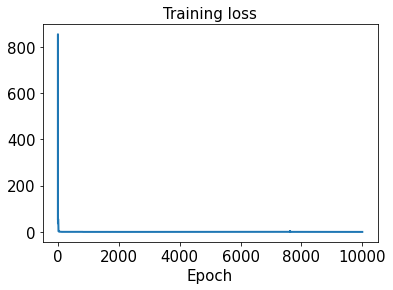

In [9]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

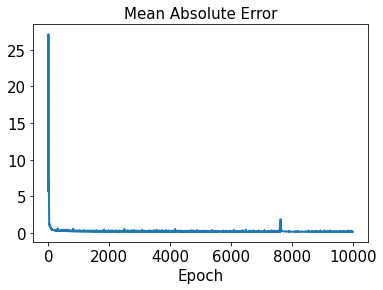

In [10]:
plt.plot(hist['mae'], lw=2)
plt.title('Mean Absolute Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [11]:
test_results = autoencoder.evaluate([x_test, tsr_test])

1/1 [==============================] - 0s 115ms/step - loss: 0.0045 - mae: 0.0000e+00 - mape: 0.0000e+00 - rmse: 0.0000e+00 - msle: 0.0000e+00


In [12]:
decoded_imgs = autoencoder.predict([x_test, tsr_test])

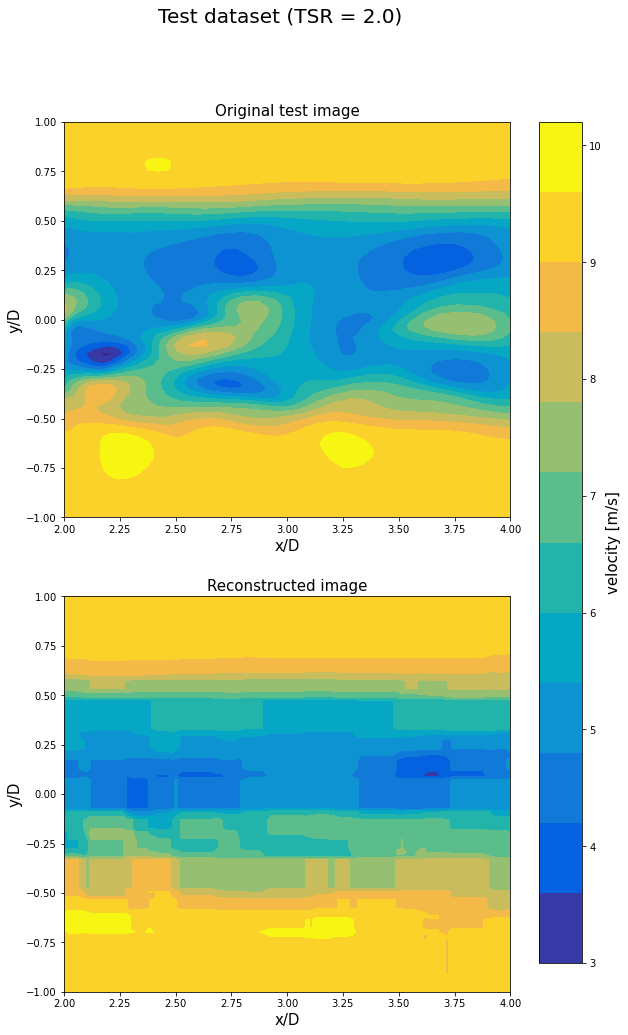

In [13]:
plt.figure(figsize=(8, 16))
xtest_rotate = x_test.T.reshape(100, 100)
decoded_rotate = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(2, 1, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, xtest_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(2, 1, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate.T, vmin=3, vmax=10, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.075, 0.73])
cbar = plt.colorbar(a2, cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)
cbar.set_ticks([3, 4, 5, 6, 7, 8, 9, 10])

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [14]:
error_test = np.abs(decoded_imgs - x_test) / x_test * 100
print(error_test)

[[[[5.160515  ]
   [1.4241037 ]
   [1.4417291 ]
   ...
   [0.07738888]
   [0.05007941]
   [4.902314  ]]

  [[1.1027913 ]
   [1.8067343 ]
   [1.8273917 ]
   ...
   [0.6572409 ]
   [0.6300919 ]
   [0.0229737 ]]

  [[1.1131921 ]
   [1.8211964 ]
   [1.840814  ]
   ...
   [0.66350317]
   [0.6363576 ]
   [0.03138439]]

  ...

  [[1.5685806 ]
   [0.74388605]
   [0.69320965]
   ...
   [0.51998675]
   [0.56865245]
   [0.25582105]]

  [[1.5842593 ]
   [0.76077   ]
   [0.7248922 ]
   ...
   [0.46596777]
   [0.5146965 ]
   [0.20277347]]

  [[6.009326  ]
   [0.46207282]
   [0.41446158]
   ...
   [0.02726786]
   [0.03023734]
   [3.8439672 ]]]]


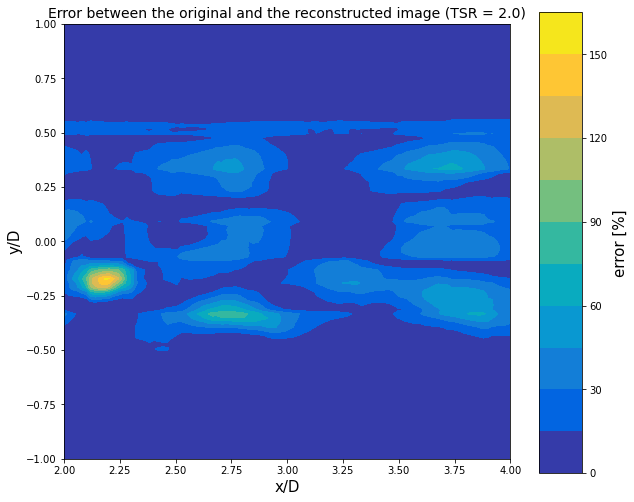

In [15]:
error_test_rotate = error_test.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 2.0)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

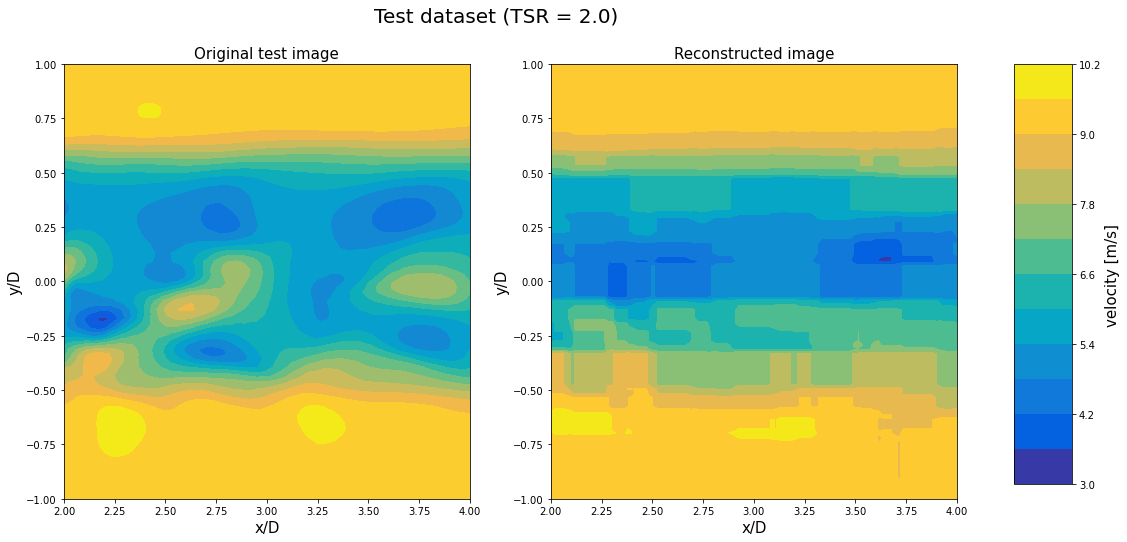

In [16]:
plt.figure(figsize=(16, 8))
xtest_rotate2 = x_test.T.reshape(100, 100)
decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, xtest_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, decoded_rotate2.T, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Test dataset (TSR = 2.0)',fontsize=20)
plt.show()

In [17]:
train0 = x_train[0].reshape(1, 100, 100, 1)
train_decode0 = autoencoder.predict([train0, tsr_train[0]]).reshape(100, 100)
print(train_decode0.shape)

(100, 100)


In [18]:
train0_orig = x_train[0].reshape(100, 100)

In [19]:
error_train0 = np.abs(train_decode0 - train0_orig) / train0_orig * 100

In [20]:
print(error_train0)

[[3.8597028  0.08802171 0.0837849  ... 0.38644382 0.35572743 4.772335  ]
 [0.26048735 0.13380674 0.12535419 ... 0.35529912 0.38368335 0.07666292]
 [0.3315864  0.04499864 0.03547123 ... 0.3584582  0.38684064 0.07138802]
 ...
 [0.18123178 0.10019521 0.02560318 ... 0.32402304 0.2866804  0.4811461 ]
 [0.13147894 0.05143589 0.062535   ... 0.28881642 0.26108575 0.45658988]
 [4.3438606  0.4702919  0.5936349  ... 0.557803   0.52039886 3.3093143 ]]


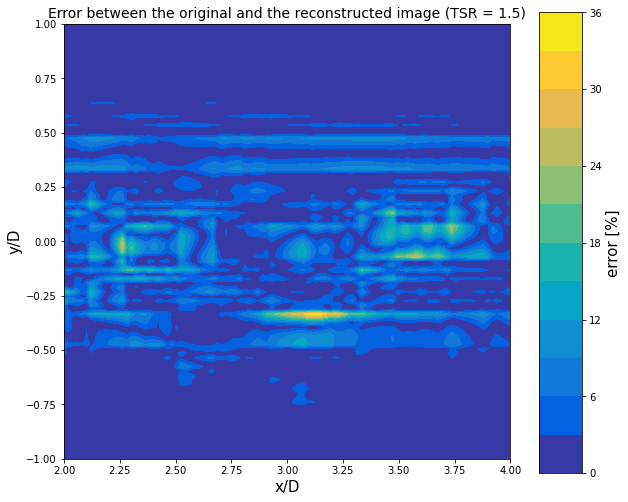

In [21]:
error_train0_rotate = error_train0.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_train0_rotate.T, levels=11, cmap=parula_map)
ax5.set_title('Error between the original and the reconstructed image (TSR = 1.5)', fontsize=14)
ax5.set_xlabel('x/D', fontsize=15)
ax5.set_ylabel('y/D', fontsize=15)

cax = plt.axes([0.95, 0.1, 0.075, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('error [%]', fontsize=15)

plt.show()

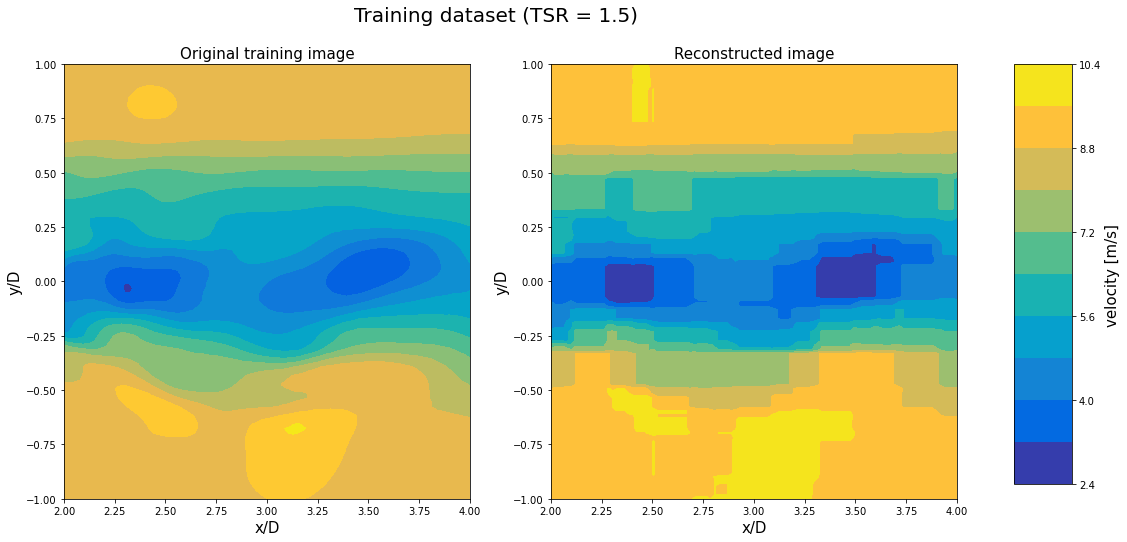

In [22]:
plt.figure(figsize=(16, 8))
#xtest_rotate2 = x_test.T.reshape(100, 100)
#decoded_rotate2 = decoded_imgs.T.reshape(100, 100)

cmap = plt.get_cmap(parula_map, 11)
xrange = np.linspace(-1, 1., 100)
yrange = np.linspace(2, 4, 100)
ymesh, xmesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train0_orig, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original training image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
plt.contourf(xmesh, ymesh, train_decode0, levels=11, cmap=cmap)
ax.set_xlabel('x/D', fontsize=15)
ax.set_ylabel('y/D', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)

cax = plt.axes([0.95, 0.15, 0.05, 0.73])
cbar = plt.colorbar(cax=cax)
cbar.set_label('velocity [m/s]', fontsize=15)

plt.suptitle('Training dataset (TSR = 1.5)',fontsize=20)
plt.show()

In [23]:
print(np.mean(error_train0))

2.5024574


In [24]:
print(np.max(error_train0))

34.494442


In [25]:
print(np.mean(error_test))

11.555637


In [26]:
print(np.max(error_test))

150.82161
